### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

C:\Users\muham\.conda\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\muham\.conda\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\muham\.conda\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\muham\.conda\envs\mlenv\lib\site-packages\tensorflow\python\framework\dty

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

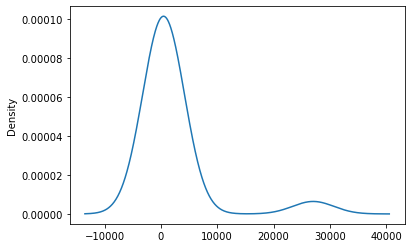

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

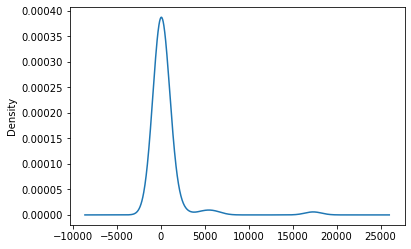

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists 
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\muham\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df.head()

C:\Users\muham\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 200
hidden_nodes_layer2 = 90
#hidden_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               8800      
_________________________________________________________________
dense_1 (Dense)              (None, 90)                18090     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 91        
Total params: 26,981
Trainable params: 26,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=2,
    save_weights_only=True,
    save_freq=1000)

In [23]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500, callbacks=[cp_callback])

Epoch 1/500
  960/25724 [>.............................] - ETA: 1s - loss: 0.5370 - acc: 0.7344
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 1440/25724 [>.............................] - ETA: 1s - loss: 0.5239 - acc: 0.7444
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5221 - acc: 0.7415
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 3488/25724 [===>..........................] - ETA: 1s - loss: 0.5298 - acc: 0.7342
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5056/25724 [====>.........................] - ETA: 1s - loss: 0.5269 - acc: 0.7379
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 5664/25724 [=====>........................] - ETA: 1s - loss: 0.5301 - acc: 0.7373
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 6240/25724 [======>.......................] - ETA: 1s - loss: 0.5296 - acc: 0.7375
Epoch 00001: saving model to checkpoints/weights.01.hdf5
 

 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5388 - acc: 0.7432
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5353 - acc: 0.7439
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5367 - acc: 0.7408
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 8960/25724 [=========>....................] - ETA: 0s - loss: 0.5352 - acc: 0.7423
Epoch 00003: saving model to checkpoints/weights.03.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5364 - acc: 0.7413
Epoch 00003: saving model to checkpoints/weights.03.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5360 - acc: 0.7406
Epoch 00003: saving model to checkpoints/weights.03.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5357 - acc: 0.7408
Epoch 00003: saving model to checkpoints/weights.03.hdf5
13056/25724 [

12800/25724 [=============>................] - ETA: 0s - loss: 0.5303 - acc: 0.7404
Epoch 00005: saving model to checkpoints/weights.05.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5305 - acc: 0.7402
Epoch 00005: saving model to checkpoints/weights.05.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5296 - acc: 0.7418
Epoch 00005: saving model to checkpoints/weights.05.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.5288 - acc: 0.7430
Epoch 00005: saving model to checkpoints/weights.05.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5294 - acc: 0.7430
Epoch 00005: saving model to checkpoints/weights.05.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5286 - acc: 0.7433
Epoch 00005: saving model to checkpoints/weights.05.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5286 - acc: 0.7435
Epoch 00005: saving model to checkpoints/weights.05.hdf5
19968/25724 [

19712/25724 [=====================>........] - ETA: 0s - loss: 0.5300 - acc: 0.7428
Epoch 00007: saving model to checkpoints/weights.07.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5300 - acc: 0.7423
Epoch 00007: saving model to checkpoints/weights.07.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5309 - acc: 0.7419
Epoch 00007: saving model to checkpoints/weights.07.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5306 - acc: 0.7424
Epoch 00007: saving model to checkpoints/weights.07.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5301 - acc: 0.7430
Epoch 00007: saving model to checkpoints/weights.07.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5297 - acc: 0.7432
Epoch 8/500
   32/25724 [..............................] - ETA: 2s - loss: 0.3999 - acc: 0.8438
Epoch 00008: saving model to checkpoints/weights.08.hdf5
  800/25724 [..............................] - ETA:

Epoch 10/500
   32/25724 [..............................] - ETA: 1s - loss: 0.3955 - acc: 0.8438
Epoch 00010: saving model to checkpoints/weights.10.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5358 - acc: 0.7288
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.5276 - acc: 0.7458
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5237 - acc: 0.7497
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5299 - acc: 0.7429
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5235 - acc: 0.7498
Epoch 00010: saving model to checkpoints/weights.10.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5220 - acc: 0.7498
Epoch 00010: saving model to checkpoints/weights.10.hdf5


 5760/25724 [=====>........................] - ETA: 1s - loss: 0.5294 - acc: 0.7462
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 6784/25724 [======>.......................] - ETA: 1s - loss: 0.5298 - acc: 0.7450
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.5292 - acc: 0.7453
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5308 - acc: 0.7448
Epoch 00012: saving model to checkpoints/weights.12.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5307 - acc: 0.7448
Epoch 00012: saving model to checkpoints/weights.12.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5283 - acc: 0.7455
Epoch 00012: saving model to checkpoints/weights.12.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5281 - acc: 0.7453
Epoch 00012: saving model to checkpoints/weights.12.hdf5
12928/25724 [

12672/25724 [=============>................] - ETA: 0s - loss: 0.5270 - acc: 0.7477
Epoch 00014: saving model to checkpoints/weights.14.hdf5
13696/25724 [==============>...............] - ETA: 0s - loss: 0.5286 - acc: 0.7461
Epoch 00014: saving model to checkpoints/weights.14.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.5292 - acc: 0.7450
Epoch 00014: saving model to checkpoints/weights.14.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5265 - acc: 0.7470
Epoch 00014: saving model to checkpoints/weights.14.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5255 - acc: 0.7477
Epoch 00014: saving model to checkpoints/weights.14.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5260 - acc: 0.7475
Epoch 00014: saving model to checkpoints/weights.14.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5261 - acc: 0.7473
Epoch 00014: saving model to checkpoints/weights.14.hdf5
19840/25724 [

19584/25724 [=====================>........] - ETA: 0s - loss: 0.5287 - acc: 0.7422
Epoch 00016: saving model to checkpoints/weights.16.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5295 - acc: 0.7418
Epoch 00016: saving model to checkpoints/weights.16.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5307 - acc: 0.7419
Epoch 00016: saving model to checkpoints/weights.16.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5300 - acc: 0.7425
Epoch 00016: saving model to checkpoints/weights.16.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5292 - acc: 0.7431
Epoch 00016: saving model to checkpoints/weights.16.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5291 - acc: 0.7435
Epoch 00016: saving model to checkpoints/weights.16.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5294 - acc: 0.7430
Epoch 17/500
   32/25724 [..............................] - ETA

Epoch 19/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4930 - acc: 0.6875
Epoch 00019: saving model to checkpoints/weights.19.hdf5
  768/25724 [..............................] - ETA: 1s - loss: 0.5052 - acc: 0.7500
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5050 - acc: 0.7556
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5127 - acc: 0.7532
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5162 - acc: 0.7529
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5204 - acc: 0.7500
Epoch 00019: saving model to checkpoints/weights.19.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5202 - acc: 0.7490
Epoch 00019: saving model to checkpoints/weights.19.hdf5


 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5290 - acc: 0.7441
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5335 - acc: 0.7393
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5327 - acc: 0.7409
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 8704/25724 [=========>....................] - ETA: 0s - loss: 0.5330 - acc: 0.7409
Epoch 00021: saving model to checkpoints/weights.21.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5305 - acc: 0.7437
Epoch 00021: saving model to checkpoints/weights.21.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5290 - acc: 0.7448
Epoch 00021: saving model to checkpoints/weights.21.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5302 - acc: 0.7447
Epoch 00021: saving model to checkpoints/weights.21.hdf5
12800/25724 [

12544/25724 [=============>................] - ETA: 0s - loss: 0.5316 - acc: 0.7415
Epoch 00023: saving model to checkpoints/weights.23.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5312 - acc: 0.7426
Epoch 00023: saving model to checkpoints/weights.23.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5322 - acc: 0.7416
Epoch 00023: saving model to checkpoints/weights.23.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5323 - acc: 0.7419
Epoch 00023: saving model to checkpoints/weights.23.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5307 - acc: 0.7427
Epoch 00023: saving model to checkpoints/weights.23.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5298 - acc: 0.7427
Epoch 00023: saving model to checkpoints/weights.23.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5293 - acc: 0.7434
Epoch 00023: saving model to checkpoints/weights.23.hdf5
19712/25724 [

19456/25724 [=====================>........] - ETA: 0s - loss: 0.5348 - acc: 0.7425
Epoch 00025: saving model to checkpoints/weights.25.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5340 - acc: 0.7434
Epoch 00025: saving model to checkpoints/weights.25.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5334 - acc: 0.7434
Epoch 00025: saving model to checkpoints/weights.25.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5331 - acc: 0.7434
Epoch 00025: saving model to checkpoints/weights.25.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5322 - acc: 0.7435
Epoch 00025: saving model to checkpoints/weights.25.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5324 - acc: 0.7433
Epoch 00025: saving model to checkpoints/weights.25.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5329 - acc: 0.7430
Epoch 26/500
   32/25724 [..............................] - ETA

Epoch 28/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5027 - acc: 0.7188
Epoch 00028: saving model to checkpoints/weights.28.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5404 - acc: 0.7326
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 1728/25724 [=>............................] - ETA: 1s - loss: 0.5180 - acc: 0.7541
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5229 - acc: 0.7481
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5330 - acc: 0.7411
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5290 - acc: 0.7443
Epoch 00028: saving model to checkpoints/weights.28.hdf5
 5760/25724 [=====>........................] - ETA: 1s - loss: 0.5325 - acc: 0.7411
Epoch 00028: saving model to checkpoints/weights.28.hdf5


 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5205 - acc: 0.7529
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5245 - acc: 0.7489
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5248 - acc: 0.7487
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 8576/25724 [=========>....................] - ETA: 0s - loss: 0.5259 - acc: 0.7477
Epoch 00030: saving model to checkpoints/weights.30.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5257 - acc: 0.7472
Epoch 00030: saving model to checkpoints/weights.30.hdf5
10624/25724 [===========>..................] - ETA: 0s - loss: 0.5235 - acc: 0.7493
Epoch 00030: saving model to checkpoints/weights.30.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.5271 - acc: 0.7464
Epoch 00030: saving model to checkpoints/weights.30.hdf5
12672/25724 [

12416/25724 [=============>................] - ETA: 0s - loss: 0.5268 - acc: 0.7447
Epoch 00032: saving model to checkpoints/weights.32.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5275 - acc: 0.7446
Epoch 00032: saving model to checkpoints/weights.32.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.5285 - acc: 0.7437
Epoch 00032: saving model to checkpoints/weights.32.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.5290 - acc: 0.7441
Epoch 00032: saving model to checkpoints/weights.32.hdf5
16512/25724 [==================>...........] - ETA: 0s - loss: 0.5289 - acc: 0.7446
Epoch 00032: saving model to checkpoints/weights.32.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 0.5291 - acc: 0.7446
Epoch 00032: saving model to checkpoints/weights.32.hdf5
18560/25724 [====================>.........] - ETA: 0s - loss: 0.5286 - acc: 0.7455
Epoch 00032: saving model to checkpoints/weights.32.hdf5
19584/25724 [

19328/25724 [=====================>........] - ETA: 0s - loss: 0.5305 - acc: 0.7441
Epoch 00034: saving model to checkpoints/weights.34.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.5303 - acc: 0.7441
Epoch 00034: saving model to checkpoints/weights.34.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5303 - acc: 0.7437
Epoch 00034: saving model to checkpoints/weights.34.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5304 - acc: 0.7443
Epoch 00034: saving model to checkpoints/weights.34.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.5299 - acc: 0.7440
Epoch 00034: saving model to checkpoints/weights.34.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5307 - acc: 0.7434
Epoch 00034: saving model to checkpoints/weights.34.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5301 - acc: 0.7434
Epoch 35/500
   32/25724 [..............................] - ETA

Epoch 37/500
   32/25724 [..............................] - ETA: 2s - loss: 0.6742 - acc: 0.6562
Epoch 00037: saving model to checkpoints/weights.37.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5216 - acc: 0.7512
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 1536/25724 [>.............................] - ETA: 1s - loss: 0.5203 - acc: 0.7585
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.5269 - acc: 0.7508
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 3584/25724 [===>..........................] - ETA: 1s - loss: 0.5327 - acc: 0.7436
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 4608/25724 [====>.........................] - ETA: 1s - loss: 0.5341 - acc: 0.7409
Epoch 00037: saving model to checkpoints/weights.37.hdf5
 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5345 - acc: 0.7409
Epoch 00037: saving model to checkpoints/weights.37.hdf5


 5376/25724 [=====>........................] - ETA: 1s - loss: 0.5368 - acc: 0.7409
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 6400/25724 [======>.......................] - ETA: 1s - loss: 0.5350 - acc: 0.7416
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 7424/25724 [=======>......................] - ETA: 1s - loss: 0.5363 - acc: 0.7394
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 8448/25724 [========>.....................] - ETA: 0s - loss: 0.5329 - acc: 0.7417
Epoch 00039: saving model to checkpoints/weights.39.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5336 - acc: 0.7408
Epoch 00039: saving model to checkpoints/weights.39.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.5326 - acc: 0.7410
Epoch 00039: saving model to checkpoints/weights.39.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.5324 - acc: 0.7407
Epoch 00039: saving model to checkpoints/weights.39.hdf5
12544/25724 [

Epoch 00041: saving model to checkpoints/weights.41.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5342 - acc: 0.7400
Epoch 00041: saving model to checkpoints/weights.41.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5345 - acc: 0.7403
Epoch 00041: saving model to checkpoints/weights.41.hdf5
14336/25724 [===============>..............] - ETA: 0s - loss: 0.5336 - acc: 0.7411
Epoch 00041: saving model to checkpoints/weights.41.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.5317 - acc: 0.7426
Epoch 00041: saving model to checkpoints/weights.41.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.5309 - acc: 0.7437
Epoch 00041: saving model to checkpoints/weights.41.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5298 - acc: 0.7448
Epoch 00041: saving model to checkpoints/weights.41.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.5290 - acc: 0.7446
Epoch 00041: 

18176/25724 [====================>.........] - ETA: 0s - loss: 0.5306 - acc: 0.7445
Epoch 00043: saving model to checkpoints/weights.43.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.5304 - acc: 0.7442
Epoch 00043: saving model to checkpoints/weights.43.hdf5
20224/25724 [======================>.......] - ETA: 0s - loss: 0.5292 - acc: 0.7453
Epoch 00043: saving model to checkpoints/weights.43.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.5294 - acc: 0.7450
Epoch 00043: saving model to checkpoints/weights.43.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5284 - acc: 0.7460
Epoch 00043: saving model to checkpoints/weights.43.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5284 - acc: 0.7449
Epoch 00043: saving model to checkpoints/weights.43.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5290 - acc: 0.7451
Epoch 00043: saving model to checkpoints/weights.43.hdf5
25724/25724 [

25724/25724 [==============================] - 1s 57us/sample - loss: 0.5300 - acc: 0.7437
Epoch 46/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5317 - acc: 0.7812
Epoch 00046: saving model to checkpoints/weights.46.hdf5
  928/25724 [>.............................] - ETA: 1s - loss: 0.5459 - acc: 0.7403
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5306 - acc: 0.7427
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 2624/25724 [==>...........................] - ETA: 1s - loss: 0.5243 - acc: 0.7428
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 3488/25724 [===>..........................] - ETA: 1s - loss: 0.5247 - acc: 0.7471
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5292 - acc: 0.7444
Epoch 00046: saving model to checkpoints/weights.46.hdf5
 5504/25724 [=====>........................] - ETA

 5248/25724 [=====>........................] - ETA: 1s - loss: 0.5300 - acc: 0.7420
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5261 - acc: 0.7446
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5283 - acc: 0.7433
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5292 - acc: 0.7423
Epoch 00048: saving model to checkpoints/weights.48.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5301 - acc: 0.7418
Epoch 00048: saving model to checkpoints/weights.48.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5289 - acc: 0.7439
Epoch 00048: saving model to checkpoints/weights.48.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5297 - acc: 0.7428
Epoch 00048: saving model to checkpoints/weights.48.hdf5
12416/25724 [

12160/25724 [=============>................] - ETA: 0s - loss: 0.7781 - acc: 0.7406
Epoch 00050: saving model to checkpoints/weights.50.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.7618 - acc: 0.7402
Epoch 00050: saving model to checkpoints/weights.50.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.7467 - acc: 0.7400
Epoch 00050: saving model to checkpoints/weights.50.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.7313 - acc: 0.7419
Epoch 00050: saving model to checkpoints/weights.50.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.7188 - acc: 0.7413
Epoch 00050: saving model to checkpoints/weights.50.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.7079 - acc: 0.7406
Epoch 00050: saving model to checkpoints/weights.50.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.6972 - acc: 0.7413
Epoch 00050: saving model to checkpoints/weights.50.hdf5
19328/25724 [

19072/25724 [=====================>........] - ETA: 0s - loss: 0.5267 - acc: 0.7460
Epoch 00052: saving model to checkpoints/weights.52.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5274 - acc: 0.7456
Epoch 00052: saving model to checkpoints/weights.52.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5273 - acc: 0.7453
Epoch 00052: saving model to checkpoints/weights.52.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5277 - acc: 0.7451
Epoch 00052: saving model to checkpoints/weights.52.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5282 - acc: 0.7449
Epoch 00052: saving model to checkpoints/weights.52.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5280 - acc: 0.7450
Epoch 00052: saving model to checkpoints/weights.52.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5290 - acc: 0.7443
Epoch 53/500
   32/25724 [..............................] - ETA

Epoch 55/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5594 - acc: 0.8125
Epoch 00055: saving model to checkpoints/weights.55.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5247 - acc: 0.7569
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 1728/25724 [=>............................] - ETA: 1s - loss: 0.5175 - acc: 0.7598
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 2592/25724 [==>...........................] - ETA: 1s - loss: 0.5271 - acc: 0.7562
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 3424/25724 [==>...........................] - ETA: 1s - loss: 0.5242 - acc: 0.7567
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.5243 - acc: 0.7532
Epoch 00055: saving model to checkpoints/weights.55.hdf5
 5376/25724 [=====>........................] - ETA: 1s - loss: 0.5260 - acc: 0.7519
Epoch 00055: saving model to checkpoints/weights.55.hdf5


 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5267 - acc: 0.7451
Epoch 00057: saving model to checkpoints/weights.57.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5271 - acc: 0.7458
Epoch 00057: saving model to checkpoints/weights.57.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5287 - acc: 0.7426
Epoch 00057: saving model to checkpoints/weights.57.hdf5
 8192/25724 [========>.....................] - ETA: 0s - loss: 0.5273 - acc: 0.7452
Epoch 00057: saving model to checkpoints/weights.57.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5285 - acc: 0.7432
Epoch 00057: saving model to checkpoints/weights.57.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5263 - acc: 0.7439
Epoch 00057: saving model to checkpoints/weights.57.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5260 - acc: 0.7448
Epoch 00057: saving model to checkpoints/weights.57.hdf5
12288/25724 [

12032/25724 [=============>................] - ETA: 0s - loss: 0.5313 - acc: 0.7426
Epoch 00059: saving model to checkpoints/weights.59.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5326 - acc: 0.7409
Epoch 00059: saving model to checkpoints/weights.59.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5320 - acc: 0.7418
Epoch 00059: saving model to checkpoints/weights.59.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5318 - acc: 0.7425
Epoch 00059: saving model to checkpoints/weights.59.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5312 - acc: 0.7432
Epoch 00059: saving model to checkpoints/weights.59.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5306 - acc: 0.7436
Epoch 00059: saving model to checkpoints/weights.59.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5308 - acc: 0.7431
Epoch 00059: saving model to checkpoints/weights.59.hdf5
19200/25724 [

18944/25724 [=====================>........] - ETA: 0s - loss: 0.5319 - acc: 0.7440
Epoch 00061: saving model to checkpoints/weights.61.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5319 - acc: 0.7437
Epoch 00061: saving model to checkpoints/weights.61.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5322 - acc: 0.7433
Epoch 00061: saving model to checkpoints/weights.61.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5327 - acc: 0.7426
Epoch 00061: saving model to checkpoints/weights.61.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5331 - acc: 0.7425
Epoch 00061: saving model to checkpoints/weights.61.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5322 - acc: 0.7434
Epoch 00061: saving model to checkpoints/weights.61.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5360 - acc: 0.7429
Epoch 62/500
   32/25724 [..............................] - ETA

Epoch 64/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4976 - acc: 0.6875
Epoch 00064: saving model to checkpoints/weights.64.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5603 - acc: 0.7083
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 1568/25724 [>.............................] - ETA: 1s - loss: 0.5396 - acc: 0.7239
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 2304/25724 [=>............................] - ETA: 1s - loss: 0.5364 - acc: 0.7292
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 3200/25724 [==>...........................] - ETA: 1s - loss: 0.5268 - acc: 0.7384
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 4224/25724 [===>..........................] - ETA: 1s - loss: 0.5317 - acc: 0.7403
Epoch 00064: saving model to checkpoints/weights.64.hdf5
 5248/25724 [=====>........................] - ETA: 1s - loss: 0.5315 - acc: 0.7407
Epoch 00064: saving model to checkpoints/weights.64.hdf5


 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5215 - acc: 0.7468
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5271 - acc: 0.7443
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5253 - acc: 0.7449
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 8064/25724 [========>.....................] - ETA: 1s - loss: 0.5264 - acc: 0.7443
Epoch 00066: saving model to checkpoints/weights.66.hdf5
 9088/25724 [=========>....................] - ETA: 0s - loss: 0.5252 - acc: 0.7453
Epoch 00066: saving model to checkpoints/weights.66.hdf5
10112/25724 [==========>...................] - ETA: 0s - loss: 0.5274 - acc: 0.7427
Epoch 00066: saving model to checkpoints/weights.66.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.5280 - acc: 0.7434
Epoch 00066: saving model to checkpoints/weights.66.hdf5
12160/25724 [

11904/25724 [============>.................] - ETA: 0s - loss: 0.5312 - acc: 0.7413
Epoch 00068: saving model to checkpoints/weights.68.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5301 - acc: 0.7428
Epoch 00068: saving model to checkpoints/weights.68.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5296 - acc: 0.7428
Epoch 00068: saving model to checkpoints/weights.68.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5287 - acc: 0.7440
Epoch 00068: saving model to checkpoints/weights.68.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 0.5301 - acc: 0.7433
Epoch 00068: saving model to checkpoints/weights.68.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5294 - acc: 0.7439
Epoch 00068: saving model to checkpoints/weights.68.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5294 - acc: 0.7436
Epoch 00068: saving model to checkpoints/weights.68.hdf5
19072/25724 [

18816/25724 [====================>.........] - ETA: 0s - loss: 0.5333 - acc: 0.7415
Epoch 00070: saving model to checkpoints/weights.70.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5328 - acc: 0.7422
Epoch 00070: saving model to checkpoints/weights.70.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5326 - acc: 0.7423
Epoch 00070: saving model to checkpoints/weights.70.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5318 - acc: 0.7427
Epoch 00070: saving model to checkpoints/weights.70.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5321 - acc: 0.7424
Epoch 00070: saving model to checkpoints/weights.70.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5318 - acc: 0.7428
Epoch 00070: saving model to checkpoints/weights.70.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5307 - acc: 0.7437
Epoch 71/500
   32/25724 [..............................] - ETA

Epoch 73/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4841 - acc: 0.8438
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.4992 - acc: 0.7656
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.5096 - acc: 0.7632
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5220 - acc: 0.7572
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5204 - acc: 0.7593
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5249 - acc: 0.7563
Epoch 00073: saving model to checkpoints/weights.73.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5242 - acc: 0.7554
Epoch 00073: saving model to checkpoints/weights.73.hdf5


 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5356 - acc: 0.7386
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5346 - acc: 0.7399
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5314 - acc: 0.7426
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 8960/25724 [=========>....................] - ETA: 0s - loss: 0.5311 - acc: 0.7427
Epoch 00075: saving model to checkpoints/weights.75.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5327 - acc: 0.7405
Epoch 00075: saving model to checkpoints/weights.75.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5321 - acc: 0.7407
Epoch 00075: saving model to checkpoints/weights.75.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5304 - acc: 0.7418
Epoch 00075: saving model to checkpoints/weights.75.hdf5
13056/25724 [

12800/25724 [=============>................] - ETA: 0s - loss: 0.5262 - acc: 0.7432
Epoch 00077: saving model to checkpoints/weights.77.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5262 - acc: 0.7445
Epoch 00077: saving model to checkpoints/weights.77.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5251 - acc: 0.7460
Epoch 00077: saving model to checkpoints/weights.77.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.5273 - acc: 0.7440
Epoch 00077: saving model to checkpoints/weights.77.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5263 - acc: 0.7455
Epoch 00077: saving model to checkpoints/weights.77.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5269 - acc: 0.7458
Epoch 00077: saving model to checkpoints/weights.77.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5288 - acc: 0.7436
Epoch 00077: saving model to checkpoints/weights.77.hdf5
19968/25724 [

19712/25724 [=====================>........] - ETA: 0s - loss: 0.5374 - acc: 0.7401
Epoch 00079: saving model to checkpoints/weights.79.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5361 - acc: 0.7407
Epoch 00079: saving model to checkpoints/weights.79.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5355 - acc: 0.7413
Epoch 00079: saving model to checkpoints/weights.79.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5355 - acc: 0.7408
Epoch 00079: saving model to checkpoints/weights.79.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5349 - acc: 0.7410
Epoch 00079: saving model to checkpoints/weights.79.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5321 - acc: 0.7433
Epoch 80/500
   32/25724 [..............................] - ETA: 3s - loss: 0.3813 - acc: 0.8438
Epoch 00080: saving model to checkpoints/weights.80.hdf5
  864/25724 [>.............................] - ETA

Epoch 82/500
   32/25724 [..............................] - ETA: 2s - loss: 0.6700 - acc: 0.6562
Epoch 00082: saving model to checkpoints/weights.82.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5325 - acc: 0.7467
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.5172 - acc: 0.7536
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5169 - acc: 0.7548
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5233 - acc: 0.7535
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5275 - acc: 0.7504
Epoch 00082: saving model to checkpoints/weights.82.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5279 - acc: 0.7480
Epoch 00082: saving model to checkpoints/weights.82.hdf5


 5760/25724 [=====>........................] - ETA: 1s - loss: 0.5210 - acc: 0.7427
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 6784/25724 [======>.......................] - ETA: 1s - loss: 0.5223 - acc: 0.7431
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.5249 - acc: 0.7414
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5232 - acc: 0.7440
Epoch 00084: saving model to checkpoints/weights.84.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5256 - acc: 0.7421
Epoch 00084: saving model to checkpoints/weights.84.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5264 - acc: 0.7426
Epoch 00084: saving model to checkpoints/weights.84.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5266 - acc: 0.7421
Epoch 00084: saving model to checkpoints/weights.84.hdf5
12928/25724 [

12672/25724 [=============>................] - ETA: 0s - loss: 0.5274 - acc: 0.7468
Epoch 00086: saving model to checkpoints/weights.86.hdf5
13696/25724 [==============>...............] - ETA: 0s - loss: 0.5254 - acc: 0.7485
Epoch 00086: saving model to checkpoints/weights.86.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.5251 - acc: 0.7480
Epoch 00086: saving model to checkpoints/weights.86.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5255 - acc: 0.7475
Epoch 00086: saving model to checkpoints/weights.86.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5257 - acc: 0.7474
Epoch 00086: saving model to checkpoints/weights.86.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5266 - acc: 0.7467
Epoch 00086: saving model to checkpoints/weights.86.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5271 - acc: 0.7463
Epoch 00086: saving model to checkpoints/weights.86.hdf5
19840/25724 [

19584/25724 [=====================>........] - ETA: 0s - loss: 0.5274 - acc: 0.7446
Epoch 00088: saving model to checkpoints/weights.88.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5269 - acc: 0.7455
Epoch 00088: saving model to checkpoints/weights.88.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5270 - acc: 0.7457
Epoch 00088: saving model to checkpoints/weights.88.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5288 - acc: 0.7440
Epoch 00088: saving model to checkpoints/weights.88.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5294 - acc: 0.7435
Epoch 00088: saving model to checkpoints/weights.88.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5295 - acc: 0.7435
Epoch 00088: saving model to checkpoints/weights.88.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5294 - acc: 0.7436
Epoch 89/500
   32/25724 [..............................] - ETA

Epoch 91/500
   32/25724 [..............................] - ETA: 3s - loss: 0.5674 - acc: 0.7500
Epoch 00091: saving model to checkpoints/weights.91.hdf5
  832/25724 [..............................] - ETA: 1s - loss: 0.5204 - acc: 0.7536
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5191 - acc: 0.7550
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5319 - acc: 0.7450
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5328 - acc: 0.7451
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5326 - acc: 0.7438
Epoch 00091: saving model to checkpoints/weights.91.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5295 - acc: 0.7475
Epoch 00091: saving model to checkpoints/weights.91.hdf5


 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5365 - acc: 0.7447
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5384 - acc: 0.7416
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5351 - acc: 0.7434
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 8704/25724 [=========>....................] - ETA: 0s - loss: 0.5339 - acc: 0.7443
Epoch 00093: saving model to checkpoints/weights.93.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5435 - acc: 0.7423
Epoch 00093: saving model to checkpoints/weights.93.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5427 - acc: 0.7423
Epoch 00093: saving model to checkpoints/weights.93.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5405 - acc: 0.7420
Epoch 00093: saving model to checkpoints/weights.93.hdf5
12800/25724 [

12544/25724 [=============>................] - ETA: 0s - loss: 0.5370 - acc: 0.7439
Epoch 00095: saving model to checkpoints/weights.95.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5365 - acc: 0.7440
Epoch 00095: saving model to checkpoints/weights.95.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5343 - acc: 0.7454
Epoch 00095: saving model to checkpoints/weights.95.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5341 - acc: 0.7449
Epoch 00095: saving model to checkpoints/weights.95.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5336 - acc: 0.7451
Epoch 00095: saving model to checkpoints/weights.95.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5336 - acc: 0.7445
Epoch 00095: saving model to checkpoints/weights.95.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5355 - acc: 0.7425
Epoch 00095: saving model to checkpoints/weights.95.hdf5
19712/25724 [

19456/25724 [=====================>........] - ETA: 0s - loss: 0.5280 - acc: 0.7468
Epoch 00097: saving model to checkpoints/weights.97.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5293 - acc: 0.7454
Epoch 00097: saving model to checkpoints/weights.97.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5287 - acc: 0.7460
Epoch 00097: saving model to checkpoints/weights.97.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5287 - acc: 0.7453
Epoch 00097: saving model to checkpoints/weights.97.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5283 - acc: 0.7453
Epoch 00097: saving model to checkpoints/weights.97.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5294 - acc: 0.7444
Epoch 00097: saving model to checkpoints/weights.97.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5295 - acc: 0.7442
Epoch 98/500
   32/25724 [..............................] - ETA

Epoch 100/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5005 - acc: 0.7500
Epoch 00100: saving model to checkpoints/weights.100.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5601 - acc: 0.7042
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.5531 - acc: 0.7093
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5378 - acc: 0.7266
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5370 - acc: 0.7290
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5371 - acc: 0.7302
Epoch 00100: saving model to checkpoints/weights.100.hdf5
 5760/25724 [=====>........................] - ETA: 1s - loss: 0.5356 - acc: 0.7345
Epoch 00100: saving model to checkpoints/weights.1

 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5323 - acc: 0.7411
Epoch 00102: saving model to checkpoints/weights.102.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5316 - acc: 0.7410
Epoch 00102: saving model to checkpoints/weights.102.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5278 - acc: 0.7439
Epoch 00102: saving model to checkpoints/weights.102.hdf5
 8576/25724 [=========>....................] - ETA: 1s - loss: 0.5271 - acc: 0.7451
Epoch 00102: saving model to checkpoints/weights.102.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5298 - acc: 0.7420
Epoch 00102: saving model to checkpoints/weights.102.hdf5
10624/25724 [===========>..................] - ETA: 0s - loss: 0.5296 - acc: 0.7426
Epoch 00102: saving model to checkpoints/weights.102.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.5286 - acc: 0.7452
Epoch 00102: saving model to checkpoints/weights.102.hdf5
12672/

11392/25724 [============>.................] - ETA: 0s - loss: 0.5314 - acc: 0.7417
Epoch 00104: saving model to checkpoints/weights.104.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5314 - acc: 0.7411
Epoch 00104: saving model to checkpoints/weights.104.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5317 - acc: 0.7418
Epoch 00104: saving model to checkpoints/weights.104.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.5313 - acc: 0.7417
Epoch 00104: saving model to checkpoints/weights.104.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.5291 - acc: 0.7430
Epoch 00104: saving model to checkpoints/weights.104.hdf5
16512/25724 [==================>...........] - ETA: 0s - loss: 0.5280 - acc: 0.7442
Epoch 00104: saving model to checkpoints/weights.104.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 0.5287 - acc: 0.7437
Epoch 00104: saving model to checkpoints/weights.104.hdf5
18560/

17280/25724 [===================>..........] - ETA: 0s - loss: 0.5271 - acc: 0.7444
Epoch 00106: saving model to checkpoints/weights.106.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5278 - acc: 0.7442
Epoch 00106: saving model to checkpoints/weights.106.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5271 - acc: 0.7442
Epoch 00106: saving model to checkpoints/weights.106.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.5285 - acc: 0.7438
Epoch 00106: saving model to checkpoints/weights.106.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5288 - acc: 0.7444
Epoch 00106: saving model to checkpoints/weights.106.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5288 - acc: 0.7437
Epoch 00106: saving model to checkpoints/weights.106.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.5299 - acc: 0.7433
Epoch 00106: saving model to checkpoints/weights.106.hdf5
24448/

23168/25724 [==========================>...] - ETA: 0s - loss: 0.5294 - acc: 0.7434
Epoch 00108: saving model to checkpoints/weights.108.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5294 - acc: 0.7435
Epoch 00108: saving model to checkpoints/weights.108.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5296 - acc: 0.7436
Epoch 109/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5821 - acc: 0.7500
Epoch 00109: saving model to checkpoints/weights.109.hdf5
  832/25724 [..............................] - ETA: 1s - loss: 0.5259 - acc: 0.7524
Epoch 00109: saving model to checkpoints/weights.109.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5209 - acc: 0.7578
Epoch 00109: saving model to checkpoints/weights.109.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.5143 - acc: 0.7586
Epoch 00109: saving model to checkpoints/weights.109.hdf5
 3584/25724 [===>..........................

 2464/25724 [=>............................] - ETA: 1s - loss: 0.5337 - acc: 0.7443
Epoch 00111: saving model to checkpoints/weights.111.hdf5
 3360/25724 [==>...........................] - ETA: 1s - loss: 0.5301 - acc: 0.7423
Epoch 00111: saving model to checkpoints/weights.111.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.5367 - acc: 0.7413
Epoch 00111: saving model to checkpoints/weights.111.hdf5
 5376/25724 [=====>........................] - ETA: 1s - loss: 0.5293 - acc: 0.7478
Epoch 00111: saving model to checkpoints/weights.111.hdf5
 6400/25724 [======>.......................] - ETA: 1s - loss: 0.5294 - acc: 0.7469
Epoch 00111: saving model to checkpoints/weights.111.hdf5
 7424/25724 [=======>......................] - ETA: 1s - loss: 0.5317 - acc: 0.7429
Epoch 00111: saving model to checkpoints/weights.111.hdf5
 8448/25724 [========>.....................] - ETA: 0s - loss: 0.5321 - acc: 0.7424
Epoch 00111: saving model to checkpoints/weights.111.hdf5
 9472/

 8192/25724 [========>.....................] - ETA: 0s - loss: 0.5312 - acc: 0.7424
Epoch 00113: saving model to checkpoints/weights.113.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5296 - acc: 0.7432
Epoch 00113: saving model to checkpoints/weights.113.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5333 - acc: 0.7397
Epoch 00113: saving model to checkpoints/weights.113.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5323 - acc: 0.7397
Epoch 00113: saving model to checkpoints/weights.113.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5333 - acc: 0.7391
Epoch 00113: saving model to checkpoints/weights.113.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5323 - acc: 0.7393
Epoch 00113: saving model to checkpoints/weights.113.hdf5
14336/25724 [===============>..............] - ETA: 0s - loss: 0.5325 - acc: 0.7389
Epoch 00113: saving model to checkpoints/weights.113.hdf5
15360/

14080/25724 [===============>..............] - ETA: 0s - loss: 0.5287 - acc: 0.7455
Epoch 00115: saving model to checkpoints/weights.115.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5289 - acc: 0.7454
Epoch 00115: saving model to checkpoints/weights.115.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5279 - acc: 0.7460
Epoch 00115: saving model to checkpoints/weights.115.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5277 - acc: 0.7463
Epoch 00115: saving model to checkpoints/weights.115.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5295 - acc: 0.7452
Epoch 00115: saving model to checkpoints/weights.115.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.5306 - acc: 0.7444
Epoch 00115: saving model to checkpoints/weights.115.hdf5
20224/25724 [======================>.......] - ETA: 0s - loss: 0.5302 - acc: 0.7441
Epoch 00115: saving model to checkpoints/weights.115.hdf5
21248/

19968/25724 [======================>.......] - ETA: 0s - loss: 0.5295 - acc: 0.7440
Epoch 00117: saving model to checkpoints/weights.117.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5289 - acc: 0.7444
Epoch 00117: saving model to checkpoints/weights.117.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5289 - acc: 0.7443
Epoch 00117: saving model to checkpoints/weights.117.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5293 - acc: 0.7438
Epoch 00117: saving model to checkpoints/weights.117.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5290 - acc: 0.7438
Epoch 00117: saving model to checkpoints/weights.117.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5313 - acc: 0.7440
Epoch 118/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5068 - acc: 0.7812
Epoch 00118: saving model to checkpoints/weights.118.hdf5
  864/25724 [>.............................

   32/25724 [..............................] - ETA: 2s - loss: 0.6080 - acc: 0.6562
Epoch 00120: saving model to checkpoints/weights.120.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5300 - acc: 0.7361
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 1632/25724 [>.............................] - ETA: 1s - loss: 0.5353 - acc: 0.7304
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.5328 - acc: 0.7363
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 3424/25724 [==>...........................] - ETA: 1s - loss: 0.5258 - acc: 0.7439
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 4256/25724 [===>..........................] - ETA: 1s - loss: 0.5220 - acc: 0.7444
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 5248/25724 [=====>........................] - ETA: 1s - loss: 0.5212 - acc: 0.7481
Epoch 00120: saving model to checkpoints/weights.120.hdf5
 6272/

 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5281 - acc: 0.7444
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5304 - acc: 0.7457
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5295 - acc: 0.7455
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 8064/25724 [========>.....................] - ETA: 1s - loss: 0.5301 - acc: 0.7439
Epoch 00122: saving model to checkpoints/weights.122.hdf5
 9088/25724 [=========>....................] - ETA: 0s - loss: 0.5296 - acc: 0.7446
Epoch 00122: saving model to checkpoints/weights.122.hdf5
10112/25724 [==========>...................] - ETA: 0s - loss: 0.5309 - acc: 0.7437
Epoch 00122: saving model to checkpoints/weights.122.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.5303 - acc: 0.7433
Epoch 00122: saving model to checkpoints/weights.122.hdf5
12160/

10880/25724 [===========>..................] - ETA: 0s - loss: 0.5338 - acc: 0.7402
Epoch 00124: saving model to checkpoints/weights.124.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5350 - acc: 0.7392
Epoch 00124: saving model to checkpoints/weights.124.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5343 - acc: 0.7392
Epoch 00124: saving model to checkpoints/weights.124.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5340 - acc: 0.7388
Epoch 00124: saving model to checkpoints/weights.124.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5338 - acc: 0.7397
Epoch 00124: saving model to checkpoints/weights.124.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 0.5320 - acc: 0.7411
Epoch 00124: saving model to checkpoints/weights.124.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5314 - acc: 0.7416
Epoch 00124: saving model to checkpoints/weights.124.hdf5
18048/

16768/25724 [==================>...........] - ETA: 0s - loss: 0.5294 - acc: 0.7453
Epoch 00126: saving model to checkpoints/weights.126.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5282 - acc: 0.7462
Epoch 00126: saving model to checkpoints/weights.126.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5292 - acc: 0.7449
Epoch 00126: saving model to checkpoints/weights.126.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5288 - acc: 0.7458
Epoch 00126: saving model to checkpoints/weights.126.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5276 - acc: 0.7465
Epoch 00126: saving model to checkpoints/weights.126.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5279 - acc: 0.7462
Epoch 00126: saving model to checkpoints/weights.126.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5285 - acc: 0.7455
Epoch 00126: saving model to checkpoints/weights.126.hdf5
23936/

22656/25724 [=========================>....] - ETA: 0s - loss: 0.5294 - acc: 0.7441
Epoch 00128: saving model to checkpoints/weights.128.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5287 - acc: 0.7442
Epoch 00128: saving model to checkpoints/weights.128.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5284 - acc: 0.7447
Epoch 00128: saving model to checkpoints/weights.128.hdf5
25724/25724 [==============================] - 2s 58us/sample - loss: 0.5292 - acc: 0.7437
Epoch 129/500
   32/25724 [..............................] - ETA: 3s - loss: 0.5622 - acc: 0.6875
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5166 - acc: 0.7500
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.5347 - acc: 0.7373
Epoch 00129: saving model to checkpoints/weights.129.hdf5
 3072/25724 [==>...........................

 1792/25724 [=>............................] - ETA: 1s - loss: 0.5251 - acc: 0.7455
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5285 - acc: 0.7383
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5322 - acc: 0.7383
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5318 - acc: 0.7381
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5293 - acc: 0.7391
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5286 - acc: 0.7425
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5292 - acc: 0.7433
Epoch 00131: saving model to checkpoints/weights.131.hdf5
 8960/

 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5377 - acc: 0.7431
Epoch 00133: saving model to checkpoints/weights.133.hdf5
 8704/25724 [=========>....................] - ETA: 0s - loss: 0.5360 - acc: 0.7448
Epoch 00133: saving model to checkpoints/weights.133.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5343 - acc: 0.7470
Epoch 00133: saving model to checkpoints/weights.133.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5437 - acc: 0.7474
Epoch 00133: saving model to checkpoints/weights.133.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5429 - acc: 0.7468
Epoch 00133: saving model to checkpoints/weights.133.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5420 - acc: 0.7476
Epoch 00133: saving model to checkpoints/weights.133.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5408 - acc: 0.7477
Epoch 00133: saving model to checkpoints/weights.133.hdf5
14848/

13568/25724 [==============>...............] - ETA: 0s - loss: 0.5313 - acc: 0.7430
Epoch 00135: saving model to checkpoints/weights.135.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5297 - acc: 0.7440
Epoch 00135: saving model to checkpoints/weights.135.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5300 - acc: 0.7444
Epoch 00135: saving model to checkpoints/weights.135.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5289 - acc: 0.7448
Epoch 00135: saving model to checkpoints/weights.135.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5291 - acc: 0.7450
Epoch 00135: saving model to checkpoints/weights.135.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5299 - acc: 0.7445
Epoch 00135: saving model to checkpoints/weights.135.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5304 - acc: 0.7436
Epoch 00135: saving model to checkpoints/weights.135.hdf5
20736/

19456/25724 [=====================>........] - ETA: 0s - loss: 0.5301 - acc: 0.7440
Epoch 00137: saving model to checkpoints/weights.137.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5288 - acc: 0.7451
Epoch 00137: saving model to checkpoints/weights.137.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5289 - acc: 0.7453
Epoch 00137: saving model to checkpoints/weights.137.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5283 - acc: 0.7457
Epoch 00137: saving model to checkpoints/weights.137.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5286 - acc: 0.7449
Epoch 00137: saving model to checkpoints/weights.137.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5287 - acc: 0.7447
Epoch 00137: saving model to checkpoints/weights.137.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5290 - acc: 0.7441
Epoch 138/500
   32/25724 [..............................

25724/25724 [==============================] - 1s 57us/sample - loss: 0.5314 - acc: 0.7445
Epoch 140/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4969 - acc: 0.7188
Epoch 00140: saving model to checkpoints/weights.140.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5234 - acc: 0.7546
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 1728/25724 [=>............................] - ETA: 1s - loss: 0.5263 - acc: 0.7483
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5176 - acc: 0.7500
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5300 - acc: 0.7408
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5288 - acc: 0.7422
Epoch 00140: saving model to checkpoints/weights.140.hdf5
 5760/25724 [=====>........................

 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5252 - acc: 0.7525
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5272 - acc: 0.7493
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5261 - acc: 0.7474
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5253 - acc: 0.7485
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 8576/25724 [=========>....................] - ETA: 0s - loss: 0.5236 - acc: 0.7490
Epoch 00142: saving model to checkpoints/weights.142.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5246 - acc: 0.7475
Epoch 00142: saving model to checkpoints/weights.142.hdf5
10624/25724 [===========>..................] - ETA: 0s - loss: 0.5258 - acc: 0.7468
Epoch 00142: saving model to checkpoints/weights.142.hdf5
11648/

10368/25724 [===========>..................] - ETA: 0s - loss: 0.5271 - acc: 0.7463
Epoch 00144: saving model to checkpoints/weights.144.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5249 - acc: 0.7479
Epoch 00144: saving model to checkpoints/weights.144.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5284 - acc: 0.7457
Epoch 00144: saving model to checkpoints/weights.144.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5290 - acc: 0.7448
Epoch 00144: saving model to checkpoints/weights.144.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.5289 - acc: 0.7444
Epoch 00144: saving model to checkpoints/weights.144.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.5292 - acc: 0.7447
Epoch 00144: saving model to checkpoints/weights.144.hdf5
16512/25724 [==================>...........] - ETA: 0s - loss: 0.5282 - acc: 0.7449
Epoch 00144: saving model to checkpoints/weights.144.hdf5
17536/

16256/25724 [=================>............] - ETA: 0s - loss: 0.5298 - acc: 0.7431
Epoch 00146: saving model to checkpoints/weights.146.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5306 - acc: 0.7424
Epoch 00146: saving model to checkpoints/weights.146.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5298 - acc: 0.7434
Epoch 00146: saving model to checkpoints/weights.146.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5307 - acc: 0.7426
Epoch 00146: saving model to checkpoints/weights.146.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.5298 - acc: 0.7425
Epoch 00146: saving model to checkpoints/weights.146.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5293 - acc: 0.7432
Epoch 00146: saving model to checkpoints/weights.146.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5290 - acc: 0.7435
Epoch 00146: saving model to checkpoints/weights.146.hdf5
23424/

22144/25724 [========================>.....] - ETA: 0s - loss: 0.5290 - acc: 0.7436
Epoch 00148: saving model to checkpoints/weights.148.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5296 - acc: 0.7434
Epoch 00148: saving model to checkpoints/weights.148.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5303 - acc: 0.7430
Epoch 00148: saving model to checkpoints/weights.148.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5290 - acc: 0.7442
Epoch 149/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5687 - acc: 0.7500
Epoch 00149: saving model to checkpoints/weights.149.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5119 - acc: 0.7581
Epoch 00149: saving model to checkpoints/weights.149.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.5273 - acc: 0.7453
Epoch 00149: saving model to checkpoints/weights.149.hdf5
 2560/25724 [=>............................

 1664/25724 [>.............................] - ETA: 1s - loss: 0.5217 - acc: 0.7500
Epoch 00151: saving model to checkpoints/weights.151.hdf5
 2464/25724 [=>............................] - ETA: 1s - loss: 0.5293 - acc: 0.7382
Epoch 00151: saving model to checkpoints/weights.151.hdf5
 3328/25724 [==>...........................] - ETA: 1s - loss: 0.5298 - acc: 0.7419
Epoch 00151: saving model to checkpoints/weights.151.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.5276 - acc: 0.7424
Epoch 00151: saving model to checkpoints/weights.151.hdf5
 5376/25724 [=====>........................] - ETA: 1s - loss: 0.5282 - acc: 0.7409
Epoch 00151: saving model to checkpoints/weights.151.hdf5
 6400/25724 [======>.......................] - ETA: 1s - loss: 0.5268 - acc: 0.7428
Epoch 00151: saving model to checkpoints/weights.151.hdf5
 7424/25724 [=======>......................] - ETA: 1s - loss: 0.5304 - acc: 0.7412
Epoch 00151: saving model to checkpoints/weights.151.hdf5
 8448/

 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5263 - acc: 0.7443
Epoch 00153: saving model to checkpoints/weights.153.hdf5
 8192/25724 [========>.....................] - ETA: 1s - loss: 0.5255 - acc: 0.7456
Epoch 00153: saving model to checkpoints/weights.153.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5273 - acc: 0.7436
Epoch 00153: saving model to checkpoints/weights.153.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5270 - acc: 0.7444
Epoch 00153: saving model to checkpoints/weights.153.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5256 - acc: 0.7449
Epoch 00153: saving model to checkpoints/weights.153.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5263 - acc: 0.7457
Epoch 00153: saving model to checkpoints/weights.153.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5266 - acc: 0.7453
Epoch 00153: saving model to checkpoints/weights.153.hdf5
14336/

13056/25724 [==============>...............] - ETA: 0s - loss: 0.5273 - acc: 0.7460
Epoch 00155: saving model to checkpoints/weights.155.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5282 - acc: 0.7446
Epoch 00155: saving model to checkpoints/weights.155.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5275 - acc: 0.7455
Epoch 00155: saving model to checkpoints/weights.155.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5281 - acc: 0.7449
Epoch 00155: saving model to checkpoints/weights.155.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5277 - acc: 0.7452
Epoch 00155: saving model to checkpoints/weights.155.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5285 - acc: 0.7448
Epoch 00155: saving model to checkpoints/weights.155.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.5289 - acc: 0.7446
Epoch 00155: saving model to checkpoints/weights.155.hdf5
20224/

18944/25724 [=====================>........] - ETA: 0s - loss: 0.5284 - acc: 0.7436
Epoch 00157: saving model to checkpoints/weights.157.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5283 - acc: 0.7438
Epoch 00157: saving model to checkpoints/weights.157.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5279 - acc: 0.7440
Epoch 00157: saving model to checkpoints/weights.157.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5288 - acc: 0.7437
Epoch 00157: saving model to checkpoints/weights.157.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5286 - acc: 0.7440
Epoch 00157: saving model to checkpoints/weights.157.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5297 - acc: 0.7431
Epoch 00157: saving model to checkpoints/weights.157.hdf5
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5289 - acc: 0.7438
Epoch 158/500
   32/25724 [..............................

25724/25724 [==============================] - 1s 56us/sample - loss: 0.5291 - acc: 0.7437
Epoch 160/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5515 - acc: 0.7500
Epoch 00160: saving model to checkpoints/weights.160.hdf5
  800/25724 [..............................] - ETA: 1s - loss: 0.5201 - acc: 0.7375
Epoch 00160: saving model to checkpoints/weights.160.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5333 - acc: 0.7374
Epoch 00160: saving model to checkpoints/weights.160.hdf5
 2464/25724 [=>............................] - ETA: 1s - loss: 0.5235 - acc: 0.7492
Epoch 00160: saving model to checkpoints/weights.160.hdf5
 3232/25724 [==>...........................] - ETA: 1s - loss: 0.5266 - acc: 0.7460
Epoch 00160: saving model to checkpoints/weights.160.hdf5
 4224/25724 [===>..........................] - ETA: 1s - loss: 0.5329 - acc: 0.7441
Epoch 00160: saving model to checkpoints/weights.160.hdf5
 5248/25724 [=====>........................

 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5399 - acc: 0.7336
Epoch 00162: saving model to checkpoints/weights.162.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5333 - acc: 0.7384
Epoch 00162: saving model to checkpoints/weights.162.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5305 - acc: 0.7425
Epoch 00162: saving model to checkpoints/weights.162.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5260 - acc: 0.7474
Epoch 00162: saving model to checkpoints/weights.162.hdf5
 8064/25724 [========>.....................] - ETA: 0s - loss: 0.5255 - acc: 0.7469
Epoch 00162: saving model to checkpoints/weights.162.hdf5
 9088/25724 [=========>....................] - ETA: 0s - loss: 0.5253 - acc: 0.7465
Epoch 00162: saving model to checkpoints/weights.162.hdf5
10112/25724 [==========>...................] - ETA: 0s - loss: 0.5247 - acc: 0.7458
Epoch 00162: saving model to checkpoints/weights.162.hdf5
11136/

 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5262 - acc: 0.7449
Epoch 00164: saving model to checkpoints/weights.164.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5245 - acc: 0.7456
Epoch 00164: saving model to checkpoints/weights.164.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5239 - acc: 0.7471
Epoch 00164: saving model to checkpoints/weights.164.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5253 - acc: 0.7464
Epoch 00164: saving model to checkpoints/weights.164.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5264 - acc: 0.7449
Epoch 00164: saving model to checkpoints/weights.164.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5263 - acc: 0.7443
Epoch 00164: saving model to checkpoints/weights.164.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 0.5277 - acc: 0.7445
Epoch 00164: saving model to checkpoints/weights.164.hdf5
17024/

15744/25724 [=================>............] - ETA: 0s - loss: 0.5276 - acc: 0.7451
Epoch 00166: saving model to checkpoints/weights.166.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5275 - acc: 0.7450
Epoch 00166: saving model to checkpoints/weights.166.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5273 - acc: 0.7456
Epoch 00166: saving model to checkpoints/weights.166.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5268 - acc: 0.7469
Epoch 00166: saving model to checkpoints/weights.166.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5268 - acc: 0.7464
Epoch 00166: saving model to checkpoints/weights.166.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5283 - acc: 0.7451
Epoch 00166: saving model to checkpoints/weights.166.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5288 - acc: 0.7446
Epoch 00166: saving model to checkpoints/weights.166.hdf5
22912/

21632/25724 [========================>.....] - ETA: 0s - loss: 0.5259 - acc: 0.7464
Epoch 00168: saving model to checkpoints/weights.168.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5265 - acc: 0.7461
Epoch 00168: saving model to checkpoints/weights.168.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5274 - acc: 0.7450
Epoch 00168: saving model to checkpoints/weights.168.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5291 - acc: 0.7438
Epoch 00168: saving model to checkpoints/weights.168.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5294 - acc: 0.7432
Epoch 169/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5698 - acc: 0.6875
Epoch 00169: saving model to checkpoints/weights.169.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5227 - acc: 0.7441
Epoch 00169: saving model to checkpoints/weights.169.hdf5
 2048/25724 [=>............................

  800/25724 [..............................] - ETA: 1s - loss: 0.5376 - acc: 0.7450
Epoch 00171: saving model to checkpoints/weights.171.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5195 - acc: 0.7517
Epoch 00171: saving model to checkpoints/weights.171.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5243 - acc: 0.7514
Epoch 00171: saving model to checkpoints/weights.171.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5417 - acc: 0.7518
Epoch 00171: saving model to checkpoints/weights.171.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5431 - acc: 0.7428
Epoch 00171: saving model to checkpoints/weights.171.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5458 - acc: 0.7373
Epoch 00171: saving model to checkpoints/weights.171.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5421 - acc: 0.7402
Epoch 00171: saving model to checkpoints/weights.171.hdf5
 7936/

 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5211 - acc: 0.7538
Epoch 00173: saving model to checkpoints/weights.173.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5216 - acc: 0.7543
Epoch 00173: saving model to checkpoints/weights.173.hdf5
 8704/25724 [=========>....................] - ETA: 1s - loss: 0.5231 - acc: 0.7544
Epoch 00173: saving model to checkpoints/weights.173.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5225 - acc: 0.7542
Epoch 00173: saving model to checkpoints/weights.173.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5242 - acc: 0.7518
Epoch 00173: saving model to checkpoints/weights.173.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5242 - acc: 0.7515
Epoch 00173: saving model to checkpoints/weights.173.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5254 - acc: 0.7505
Epoch 00173: saving model to checkpoints/weights.173.hdf5
13824/

12544/25724 [=============>................] - ETA: 0s - loss: 0.5224 - acc: 0.7475
Epoch 00175: saving model to checkpoints/weights.175.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5233 - acc: 0.7467
Epoch 00175: saving model to checkpoints/weights.175.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5226 - acc: 0.7471
Epoch 00175: saving model to checkpoints/weights.175.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5238 - acc: 0.7461
Epoch 00175: saving model to checkpoints/weights.175.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5248 - acc: 0.7460
Epoch 00175: saving model to checkpoints/weights.175.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5274 - acc: 0.7449
Epoch 00175: saving model to checkpoints/weights.175.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5287 - acc: 0.7437
Epoch 00175: saving model to checkpoints/weights.175.hdf5
19712/

18432/25724 [====================>.........] - ETA: 0s - loss: 0.5289 - acc: 0.7437
Epoch 00177: saving model to checkpoints/weights.177.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5281 - acc: 0.7443
Epoch 00177: saving model to checkpoints/weights.177.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5290 - acc: 0.7445
Epoch 00177: saving model to checkpoints/weights.177.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5293 - acc: 0.7443
Epoch 00177: saving model to checkpoints/weights.177.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5293 - acc: 0.7442
Epoch 00177: saving model to checkpoints/weights.177.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5288 - acc: 0.7444
Epoch 00177: saving model to checkpoints/weights.177.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5286 - acc: 0.7449
Epoch 00177: saving model to checkpoints/weights.177.hdf5
25724/

24320/25724 [===========================>..] - ETA: 0s - loss: 0.5285 - acc: 0.7448
Epoch 00179: saving model to checkpoints/weights.179.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5291 - acc: 0.7439
Epoch 180/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5955 - acc: 0.6875
Epoch 00180: saving model to checkpoints/weights.180.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5398 - acc: 0.7310
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 1728/25724 [=>............................] - ETA: 1s - loss: 0.5385 - acc: 0.7332
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5407 - acc: 0.7292
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5379 - acc: 0.7303
Epoch 00180: saving model to checkpoints/weights.180.hdf5
 4736/25724 [====>.........................

 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5180 - acc: 0.7488
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5217 - acc: 0.7435
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5266 - acc: 0.7404
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5249 - acc: 0.7423
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5333 - acc: 0.7448
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 8576/25724 [=========>....................] - ETA: 1s - loss: 0.5324 - acc: 0.7451
Epoch 00182: saving model to checkpoints/weights.182.hdf5
 9600/25724 [==========>...................] - ETA: 1s - loss: 0.5301 - acc: 0.7461
Epoch 00182: saving model to checkpoints/weights.182.hdf5
10624/

 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5358 - acc: 0.7398
Epoch 00184: saving model to checkpoints/weights.184.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5338 - acc: 0.7412
Epoch 00184: saving model to checkpoints/weights.184.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5307 - acc: 0.7440
Epoch 00184: saving model to checkpoints/weights.184.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5307 - acc: 0.7430
Epoch 00184: saving model to checkpoints/weights.184.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5302 - acc: 0.7433
Epoch 00184: saving model to checkpoints/weights.184.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.5292 - acc: 0.7441
Epoch 00184: saving model to checkpoints/weights.184.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.5288 - acc: 0.7439
Epoch 00184: saving model to checkpoints/weights.184.hdf5
16512/

15232/25724 [================>.............] - ETA: 0s - loss: 0.5256 - acc: 0.7468
Epoch 00186: saving model to checkpoints/weights.186.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5265 - acc: 0.7461
Epoch 00186: saving model to checkpoints/weights.186.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5262 - acc: 0.7459
Epoch 00186: saving model to checkpoints/weights.186.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5263 - acc: 0.7461
Epoch 00186: saving model to checkpoints/weights.186.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5276 - acc: 0.7456
Epoch 00186: saving model to checkpoints/weights.186.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.5279 - acc: 0.7449
Epoch 00186: saving model to checkpoints/weights.186.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5272 - acc: 0.7454
Epoch 00186: saving model to checkpoints/weights.186.hdf5
22400/

21120/25724 [=======================>......] - ETA: 0s - loss: 0.5299 - acc: 0.7436
Epoch 00188: saving model to checkpoints/weights.188.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5297 - acc: 0.7435
Epoch 00188: saving model to checkpoints/weights.188.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5295 - acc: 0.7439
Epoch 00188: saving model to checkpoints/weights.188.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5292 - acc: 0.7442
Epoch 00188: saving model to checkpoints/weights.188.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5288 - acc: 0.7440
Epoch 189/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4631 - acc: 0.7812
Epoch 00189: saving model to checkpoints/weights.189.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5313 - acc: 0.7455
Epoch 00189: saving model to checkpoints/weights.189.hdf5
 1664/25724 [>.............................

  896/25724 [>.............................] - ETA: 1s - loss: 0.5421 - acc: 0.7221
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 1824/25724 [=>............................] - ETA: 1s - loss: 0.5250 - acc: 0.7462
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 2656/25724 [==>...........................] - ETA: 1s - loss: 0.5266 - acc: 0.7436
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 3520/25724 [===>..........................] - ETA: 1s - loss: 0.5265 - acc: 0.7423
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 4384/25724 [====>.........................] - ETA: 1s - loss: 0.5258 - acc: 0.7427
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 5376/25724 [=====>........................] - ETA: 1s - loss: 0.5232 - acc: 0.7455
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 6400/25724 [======>.......................] - ETA: 1s - loss: 0.5231 - acc: 0.7462
Epoch 00191: saving model to checkpoints/weights.191.hdf5
 7424/

 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5293 - acc: 0.7386
Epoch 00193: saving model to checkpoints/weights.193.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5276 - acc: 0.7397
Epoch 00193: saving model to checkpoints/weights.193.hdf5
 8192/25724 [========>.....................] - ETA: 0s - loss: 0.5300 - acc: 0.7395
Epoch 00193: saving model to checkpoints/weights.193.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5327 - acc: 0.7369
Epoch 00193: saving model to checkpoints/weights.193.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5306 - acc: 0.7402
Epoch 00193: saving model to checkpoints/weights.193.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5288 - acc: 0.7416
Epoch 00193: saving model to checkpoints/weights.193.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5282 - acc: 0.7428
Epoch 00193: saving model to checkpoints/weights.193.hdf5
13312/

12032/25724 [=============>................] - ETA: 0s - loss: 0.5277 - acc: 0.7480
Epoch 00195: saving model to checkpoints/weights.195.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5274 - acc: 0.7472
Epoch 00195: saving model to checkpoints/weights.195.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5289 - acc: 0.7469
Epoch 00195: saving model to checkpoints/weights.195.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5289 - acc: 0.7468
Epoch 00195: saving model to checkpoints/weights.195.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5298 - acc: 0.7468
Epoch 00195: saving model to checkpoints/weights.195.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5292 - acc: 0.7471
Epoch 00195: saving model to checkpoints/weights.195.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5293 - acc: 0.7468
Epoch 00195: saving model to checkpoints/weights.195.hdf5
19200/

17920/25724 [===================>..........] - ETA: 0s - loss: 0.5260 - acc: 0.7453
Epoch 00197: saving model to checkpoints/weights.197.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5267 - acc: 0.7448
Epoch 00197: saving model to checkpoints/weights.197.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5267 - acc: 0.7452
Epoch 00197: saving model to checkpoints/weights.197.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5265 - acc: 0.7453
Epoch 00197: saving model to checkpoints/weights.197.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5269 - acc: 0.7455
Epoch 00197: saving model to checkpoints/weights.197.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5274 - acc: 0.7450
Epoch 00197: saving model to checkpoints/weights.197.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5275 - acc: 0.7446
Epoch 00197: saving model to checkpoints/weights.197.hdf5
25724/

23808/25724 [==========================>...] - ETA: 0s - loss: 0.5286 - acc: 0.7437
Epoch 00199: saving model to checkpoints/weights.199.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5287 - acc: 0.7438
Epoch 200/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5408 - acc: 0.7500
Epoch 00200: saving model to checkpoints/weights.200.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5272 - acc: 0.7600
Epoch 00200: saving model to checkpoints/weights.200.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5225 - acc: 0.7533
Epoch 00200: saving model to checkpoints/weights.200.hdf5
 2624/25724 [==>...........................] - ETA: 1s - loss: 0.5302 - acc: 0.7470
Epoch 00200: saving model to checkpoints/weights.200.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5205 - acc: 0.7543
Epoch 00200: saving model to checkpoints/weights.200.hdf5
 4352/25724 [====>.........................

 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5336 - acc: 0.7357
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5275 - acc: 0.7409
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5346 - acc: 0.7358
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5383 - acc: 0.7317
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5354 - acc: 0.7352
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 8064/25724 [========>.....................] - ETA: 0s - loss: 0.5361 - acc: 0.7352
Epoch 00202: saving model to checkpoints/weights.202.hdf5
 9088/25724 [=========>....................] - ETA: 0s - loss: 0.5353 - acc: 0.7370
Epoch 00202: saving model to checkpoints/weights.202.hdf5
10112/

 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5341 - acc: 0.7392
Epoch 00204: saving model to checkpoints/weights.204.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5335 - acc: 0.7387
Epoch 00204: saving model to checkpoints/weights.204.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5296 - acc: 0.7425
Epoch 00204: saving model to checkpoints/weights.204.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5296 - acc: 0.7430
Epoch 00204: saving model to checkpoints/weights.204.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5291 - acc: 0.7437
Epoch 00204: saving model to checkpoints/weights.204.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5276 - acc: 0.7460
Epoch 00204: saving model to checkpoints/weights.204.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5284 - acc: 0.7456
Epoch 00204: saving model to checkpoints/weights.204.hdf5
16000/

14720/25724 [================>.............] - ETA: 0s - loss: 0.5345 - acc: 0.7456
Epoch 00206: saving model to checkpoints/weights.206.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5360 - acc: 0.7438
Epoch 00206: saving model to checkpoints/weights.206.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5349 - acc: 0.7455
Epoch 00206: saving model to checkpoints/weights.206.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5354 - acc: 0.7453
Epoch 00206: saving model to checkpoints/weights.206.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5359 - acc: 0.7444
Epoch 00206: saving model to checkpoints/weights.206.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5387 - acc: 0.7432
Epoch 00206: saving model to checkpoints/weights.206.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5383 - acc: 0.7433
Epoch 00206: saving model to checkpoints/weights.206.hdf5
21888/

20704/25724 [=======================>......] - ETA: 0s - loss: 0.5267 - acc: 0.7451
Epoch 00208: saving model to checkpoints/weights.208.hdf5
21696/25724 [========================>.....] - ETA: 0s - loss: 0.5265 - acc: 0.7454
Epoch 00208: saving model to checkpoints/weights.208.hdf5
22816/25724 [=========================>....] - ETA: 0s - loss: 0.5271 - acc: 0.7449
Epoch 00208: saving model to checkpoints/weights.208.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5276 - acc: 0.7444
Epoch 00208: saving model to checkpoints/weights.208.hdf5
25056/25724 [============================>.] - ETA: 0s - loss: 0.5283 - acc: 0.7438
Epoch 00208: saving model to checkpoints/weights.208.hdf5
25724/25724 [==============================] - 1s 53us/sample - loss: 0.5285 - acc: 0.7438
Epoch 209/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5226 - acc: 0.7188
Epoch 00209: saving model to checkpoints/weights.209.hdf5
 1056/25724 [>.............................

 1792/25724 [=>............................] - ETA: 1s - loss: 0.5319 - acc: 0.7427
Epoch 00211: saving model to checkpoints/weights.211.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5286 - acc: 0.7468
Epoch 00211: saving model to checkpoints/weights.211.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5287 - acc: 0.7453
Epoch 00211: saving model to checkpoints/weights.211.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5266 - acc: 0.7471
Epoch 00211: saving model to checkpoints/weights.211.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5286 - acc: 0.7449
Epoch 00211: saving model to checkpoints/weights.211.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5262 - acc: 0.7457
Epoch 00211: saving model to checkpoints/weights.211.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5296 - acc: 0.7456
Epoch 00211: saving model to checkpoints/weights.211.hdf5
 8960/

 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5259 - acc: 0.7480
Epoch 00213: saving model to checkpoints/weights.213.hdf5
 8704/25724 [=========>....................] - ETA: 0s - loss: 0.5250 - acc: 0.7503
Epoch 00213: saving model to checkpoints/weights.213.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5261 - acc: 0.7490
Epoch 00213: saving model to checkpoints/weights.213.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5285 - acc: 0.7492
Epoch 00213: saving model to checkpoints/weights.213.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5278 - acc: 0.7494
Epoch 00213: saving model to checkpoints/weights.213.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5295 - acc: 0.7466
Epoch 00213: saving model to checkpoints/weights.213.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5301 - acc: 0.7456
Epoch 00213: saving model to checkpoints/weights.213.hdf5
14848/

13568/25724 [==============>...............] - ETA: 0s - loss: 0.5278 - acc: 0.7461
Epoch 00215: saving model to checkpoints/weights.215.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5290 - acc: 0.7446
Epoch 00215: saving model to checkpoints/weights.215.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5292 - acc: 0.7451
Epoch 00215: saving model to checkpoints/weights.215.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5290 - acc: 0.7446
Epoch 00215: saving model to checkpoints/weights.215.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5309 - acc: 0.7431
Epoch 00215: saving model to checkpoints/weights.215.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5308 - acc: 0.7430
Epoch 00215: saving model to checkpoints/weights.215.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5306 - acc: 0.7427
Epoch 00215: saving model to checkpoints/weights.215.hdf5
20736/

19456/25724 [=====================>........] - ETA: 0s - loss: 0.5292 - acc: 0.7420
Epoch 00217: saving model to checkpoints/weights.217.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5292 - acc: 0.7421
Epoch 00217: saving model to checkpoints/weights.217.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5292 - acc: 0.7418
Epoch 00217: saving model to checkpoints/weights.217.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5283 - acc: 0.7431
Epoch 00217: saving model to checkpoints/weights.217.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5296 - acc: 0.7423
Epoch 00217: saving model to checkpoints/weights.217.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5294 - acc: 0.7430
Epoch 00217: saving model to checkpoints/weights.217.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5287 - acc: 0.7435
Epoch 218/500
   32/25724 [..............................

25724/25724 [==============================] - 1s 57us/sample - loss: 0.5302 - acc: 0.7439
Epoch 220/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4597 - acc: 0.7500
Epoch 00220: saving model to checkpoints/weights.220.hdf5
  832/25724 [..............................] - ETA: 1s - loss: 0.5181 - acc: 0.7512
Epoch 00220: saving model to checkpoints/weights.220.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.5135 - acc: 0.7535
Epoch 00220: saving model to checkpoints/weights.220.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5165 - acc: 0.7526
Epoch 00220: saving model to checkpoints/weights.220.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5233 - acc: 0.7481
Epoch 00220: saving model to checkpoints/weights.220.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5275 - acc: 0.7451
Epoch 00220: saving model to checkpoints/weights.220.hdf5
 5760/25724 [=====>........................

 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5317 - acc: 0.7444
Epoch 00222: saving model to checkpoints/weights.222.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5277 - acc: 0.7484
Epoch 00222: saving model to checkpoints/weights.222.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5318 - acc: 0.7453
Epoch 00222: saving model to checkpoints/weights.222.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5292 - acc: 0.7463
Epoch 00222: saving model to checkpoints/weights.222.hdf5
 8576/25724 [=========>....................] - ETA: 1s - loss: 0.5283 - acc: 0.7465
Epoch 00222: saving model to checkpoints/weights.222.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5305 - acc: 0.7451
Epoch 00222: saving model to checkpoints/weights.222.hdf5
10624/25724 [===========>..................] - ETA: 0s - loss: 0.5302 - acc: 0.7448
Epoch 00222: saving model to checkpoints/weights.222.hdf5
11648/

10368/25724 [===========>..................] - ETA: 0s - loss: 0.5245 - acc: 0.7468
Epoch 00224: saving model to checkpoints/weights.224.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5253 - acc: 0.7466
Epoch 00224: saving model to checkpoints/weights.224.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5284 - acc: 0.7437
Epoch 00224: saving model to checkpoints/weights.224.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5283 - acc: 0.7434
Epoch 00224: saving model to checkpoints/weights.224.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.5275 - acc: 0.7443
Epoch 00224: saving model to checkpoints/weights.224.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.5275 - acc: 0.7446
Epoch 00224: saving model to checkpoints/weights.224.hdf5
16512/25724 [==================>...........] - ETA: 0s - loss: 0.5284 - acc: 0.7439
Epoch 00224: saving model to checkpoints/weights.224.hdf5
17536/

16256/25724 [=================>............] - ETA: 0s - loss: 0.5303 - acc: 0.7419
Epoch 00226: saving model to checkpoints/weights.226.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5300 - acc: 0.7421
Epoch 00226: saving model to checkpoints/weights.226.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5299 - acc: 0.7424
Epoch 00226: saving model to checkpoints/weights.226.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5287 - acc: 0.7433
Epoch 00226: saving model to checkpoints/weights.226.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.5284 - acc: 0.7433
Epoch 00226: saving model to checkpoints/weights.226.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5291 - acc: 0.7431
Epoch 00226: saving model to checkpoints/weights.226.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5283 - acc: 0.7445
Epoch 00226: saving model to checkpoints/weights.226.hdf5
23424/

22144/25724 [========================>.....] - ETA: 0s - loss: 0.5287 - acc: 0.7439
Epoch 00228: saving model to checkpoints/weights.228.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5299 - acc: 0.7432
Epoch 00228: saving model to checkpoints/weights.228.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5284 - acc: 0.7442
Epoch 00228: saving model to checkpoints/weights.228.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5300 - acc: 0.7431
Epoch 229/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5596 - acc: 0.7500
Epoch 00229: saving model to checkpoints/weights.229.hdf5
  800/25724 [..............................] - ETA: 1s - loss: 0.5139 - acc: 0.7538
Epoch 00229: saving model to checkpoints/weights.229.hdf5
 1536/25724 [>.............................] - ETA: 1s - loss: 0.5292 - acc: 0.7422
Epoch 00229: saving model to checkpoints/weights.229.hdf5
 2560/25724 [=>............................

 1600/25724 [>.............................] - ETA: 1s - loss: 0.5386 - acc: 0.7544
Epoch 00231: saving model to checkpoints/weights.231.hdf5
 2368/25724 [=>............................] - ETA: 1s - loss: 0.5415 - acc: 0.7454
Epoch 00231: saving model to checkpoints/weights.231.hdf5
 3328/25724 [==>...........................] - ETA: 1s - loss: 0.5482 - acc: 0.7374
Epoch 00231: saving model to checkpoints/weights.231.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.5439 - acc: 0.7374
Epoch 00231: saving model to checkpoints/weights.231.hdf5
 5376/25724 [=====>........................] - ETA: 1s - loss: 0.5363 - acc: 0.7418
Epoch 00231: saving model to checkpoints/weights.231.hdf5
 6400/25724 [======>.......................] - ETA: 1s - loss: 0.5374 - acc: 0.7403
Epoch 00231: saving model to checkpoints/weights.231.hdf5
 7424/25724 [=======>......................] - ETA: 1s - loss: 0.5357 - acc: 0.7419
Epoch 00231: saving model to checkpoints/weights.231.hdf5
 8448/

 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5293 - acc: 0.7437
Epoch 00233: saving model to checkpoints/weights.233.hdf5
 8192/25724 [========>.....................] - ETA: 1s - loss: 0.5272 - acc: 0.7465
Epoch 00233: saving model to checkpoints/weights.233.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5298 - acc: 0.7440
Epoch 00233: saving model to checkpoints/weights.233.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5317 - acc: 0.7421
Epoch 00233: saving model to checkpoints/weights.233.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5314 - acc: 0.7422
Epoch 00233: saving model to checkpoints/weights.233.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5315 - acc: 0.7428
Epoch 00233: saving model to checkpoints/weights.233.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5308 - acc: 0.7437
Epoch 00233: saving model to checkpoints/weights.233.hdf5
14336/

13056/25724 [==============>...............] - ETA: 0s - loss: 0.5267 - acc: 0.7466
Epoch 00235: saving model to checkpoints/weights.235.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5279 - acc: 0.7454
Epoch 00235: saving model to checkpoints/weights.235.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5257 - acc: 0.7470
Epoch 00235: saving model to checkpoints/weights.235.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5259 - acc: 0.7463
Epoch 00235: saving model to checkpoints/weights.235.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5275 - acc: 0.7456
Epoch 00235: saving model to checkpoints/weights.235.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5279 - acc: 0.7453
Epoch 00235: saving model to checkpoints/weights.235.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.5286 - acc: 0.7440
Epoch 00235: saving model to checkpoints/weights.235.hdf5
20224/

18944/25724 [=====================>........] - ETA: 0s - loss: 0.5281 - acc: 0.7452
Epoch 00237: saving model to checkpoints/weights.237.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5279 - acc: 0.7455
Epoch 00237: saving model to checkpoints/weights.237.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5281 - acc: 0.7454
Epoch 00237: saving model to checkpoints/weights.237.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5284 - acc: 0.7453
Epoch 00237: saving model to checkpoints/weights.237.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5292 - acc: 0.7447
Epoch 00237: saving model to checkpoints/weights.237.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5290 - acc: 0.7448
Epoch 00237: saving model to checkpoints/weights.237.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5292 - acc: 0.7441
Epoch 238/500
   32/25724 [..............................

25724/25724 [==============================] - 1s 58us/sample - loss: 0.5288 - acc: 0.7443
Epoch 240/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5191 - acc: 0.7188
Epoch 00240: saving model to checkpoints/weights.240.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5396 - acc: 0.7292
Epoch 00240: saving model to checkpoints/weights.240.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5235 - acc: 0.7404
Epoch 00240: saving model to checkpoints/weights.240.hdf5
 2464/25724 [=>............................] - ETA: 1s - loss: 0.5236 - acc: 0.7407
Epoch 00240: saving model to checkpoints/weights.240.hdf5
 3264/25724 [==>...........................] - ETA: 1s - loss: 0.5284 - acc: 0.7390
Epoch 00240: saving model to checkpoints/weights.240.hdf5
 4224/25724 [===>..........................] - ETA: 1s - loss: 0.5281 - acc: 0.7408
Epoch 00240: saving model to checkpoints/weights.240.hdf5
 5248/25724 [=====>........................

 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5280 - acc: 0.7434
Epoch 00242: saving model to checkpoints/weights.242.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5245 - acc: 0.7460
Epoch 00242: saving model to checkpoints/weights.242.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5232 - acc: 0.7472
Epoch 00242: saving model to checkpoints/weights.242.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5238 - acc: 0.7457
Epoch 00242: saving model to checkpoints/weights.242.hdf5
 8064/25724 [========>.....................] - ETA: 1s - loss: 0.5230 - acc: 0.7490
Epoch 00242: saving model to checkpoints/weights.242.hdf5
 9088/25724 [=========>....................] - ETA: 0s - loss: 0.5261 - acc: 0.7477
Epoch 00242: saving model to checkpoints/weights.242.hdf5
10112/25724 [==========>...................] - ETA: 0s - loss: 0.5281 - acc: 0.7452
Epoch 00242: saving model to checkpoints/weights.242.hdf5
11136/

 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5593 - acc: 0.7505
Epoch 00244: saving model to checkpoints/weights.244.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5532 - acc: 0.7526
Epoch 00244: saving model to checkpoints/weights.244.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5504 - acc: 0.7530
Epoch 00244: saving model to checkpoints/weights.244.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5503 - acc: 0.7512
Epoch 00244: saving model to checkpoints/weights.244.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5479 - acc: 0.7511
Epoch 00244: saving model to checkpoints/weights.244.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5472 - acc: 0.7496
Epoch 00244: saving model to checkpoints/weights.244.hdf5
16000/25724 [=================>............] - ETA: 0s - loss: 0.5464 - acc: 0.7494
Epoch 00244: saving model to checkpoints/weights.244.hdf5
17024/

15744/25724 [=================>............] - ETA: 0s - loss: 0.5289 - acc: 0.7440
Epoch 00246: saving model to checkpoints/weights.246.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5290 - acc: 0.7437
Epoch 00246: saving model to checkpoints/weights.246.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5285 - acc: 0.7442
Epoch 00246: saving model to checkpoints/weights.246.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5283 - acc: 0.7444
Epoch 00246: saving model to checkpoints/weights.246.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5282 - acc: 0.7450
Epoch 00246: saving model to checkpoints/weights.246.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5287 - acc: 0.7446
Epoch 00246: saving model to checkpoints/weights.246.hdf5
21888/25724 [========================>.....] - ETA: 0s - loss: 0.5284 - acc: 0.7451
Epoch 00246: saving model to checkpoints/weights.246.hdf5
22912/

21632/25724 [========================>.....] - ETA: 0s - loss: 0.5298 - acc: 0.7431
Epoch 00248: saving model to checkpoints/weights.248.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5298 - acc: 0.7432
Epoch 00248: saving model to checkpoints/weights.248.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5293 - acc: 0.7437
Epoch 00248: saving model to checkpoints/weights.248.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5283 - acc: 0.7446
Epoch 00248: saving model to checkpoints/weights.248.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5285 - acc: 0.7445
Epoch 249/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5308 - acc: 0.7812
Epoch 00249: saving model to checkpoints/weights.249.hdf5
 1024/25724 [>.............................] - ETA: 1s - loss: 0.5113 - acc: 0.7588
Epoch 00249: saving model to checkpoints/weights.249.hdf5
 2048/25724 [=>............................

  864/25724 [>.............................] - ETA: 1s - loss: 0.5159 - acc: 0.7477
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5173 - acc: 0.7444
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5123 - acc: 0.7493
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5186 - acc: 0.7464
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5250 - acc: 0.7424
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5255 - acc: 0.7396
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5280 - acc: 0.7378
Epoch 00251: saving model to checkpoints/weights.251.hdf5
 7936/

 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5261 - acc: 0.7467
Epoch 00253: saving model to checkpoints/weights.253.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5257 - acc: 0.7473
Epoch 00253: saving model to checkpoints/weights.253.hdf5
 8704/25724 [=========>....................] - ETA: 1s - loss: 0.5281 - acc: 0.7462
Epoch 00253: saving model to checkpoints/weights.253.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5278 - acc: 0.7457
Epoch 00253: saving model to checkpoints/weights.253.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5260 - acc: 0.7476
Epoch 00253: saving model to checkpoints/weights.253.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5264 - acc: 0.7473
Epoch 00253: saving model to checkpoints/weights.253.hdf5
12800/25724 [=============>................] - ETA: 0s - loss: 0.5289 - acc: 0.7443
Epoch 00253: saving model to checkpoints/weights.253.hdf5
13824/

12544/25724 [=============>................] - ETA: 0s - loss: 0.5290 - acc: 0.7438
Epoch 00255: saving model to checkpoints/weights.255.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5288 - acc: 0.7438
Epoch 00255: saving model to checkpoints/weights.255.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5286 - acc: 0.7438
Epoch 00255: saving model to checkpoints/weights.255.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5290 - acc: 0.7431
Epoch 00255: saving model to checkpoints/weights.255.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5279 - acc: 0.7437
Epoch 00255: saving model to checkpoints/weights.255.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5275 - acc: 0.7440
Epoch 00255: saving model to checkpoints/weights.255.hdf5
18688/25724 [====================>.........] - ETA: 0s - loss: 0.5286 - acc: 0.7430
Epoch 00255: saving model to checkpoints/weights.255.hdf5
19712/

18432/25724 [====================>.........] - ETA: 0s - loss: 0.5302 - acc: 0.7441
Epoch 00257: saving model to checkpoints/weights.257.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5303 - acc: 0.7446
Epoch 00257: saving model to checkpoints/weights.257.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5312 - acc: 0.7440
Epoch 00257: saving model to checkpoints/weights.257.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5298 - acc: 0.7450
Epoch 00257: saving model to checkpoints/weights.257.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5289 - acc: 0.7452
Epoch 00257: saving model to checkpoints/weights.257.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5285 - acc: 0.7452
Epoch 00257: saving model to checkpoints/weights.257.hdf5
24576/25724 [===========================>..] - ETA: 0s - loss: 0.5285 - acc: 0.7450
Epoch 00257: saving model to checkpoints/weights.257.hdf5
25724/

24320/25724 [===========================>..] - ETA: 0s - loss: 0.5317 - acc: 0.7428
Epoch 00259: saving model to checkpoints/weights.259.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5305 - acc: 0.7438
Epoch 260/500
   32/25724 [..............................] - ETA: 2s - loss: 0.6386 - acc: 0.5938
Epoch 00260: saving model to checkpoints/weights.260.hdf5
  800/25724 [..............................] - ETA: 1s - loss: 0.5473 - acc: 0.7312
Epoch 00260: saving model to checkpoints/weights.260.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5353 - acc: 0.7446
Epoch 00260: saving model to checkpoints/weights.260.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5281 - acc: 0.7511
Epoch 00260: saving model to checkpoints/weights.260.hdf5
 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5295 - acc: 0.7457
Epoch 00260: saving model to checkpoints/weights.260.hdf5
 4736/25724 [====>.........................

 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5247 - acc: 0.7494
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5272 - acc: 0.7467
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5271 - acc: 0.7467
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5295 - acc: 0.7460
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5325 - acc: 0.7447
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 8576/25724 [=========>....................] - ETA: 0s - loss: 0.5337 - acc: 0.7429
Epoch 00262: saving model to checkpoints/weights.262.hdf5
 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5406 - acc: 0.7421
Epoch 00262: saving model to checkpoints/weights.262.hdf5
10624/

 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5291 - acc: 0.7498
Epoch 00264: saving model to checkpoints/weights.264.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5305 - acc: 0.7486
Epoch 00264: saving model to checkpoints/weights.264.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5279 - acc: 0.7490
Epoch 00264: saving model to checkpoints/weights.264.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5322 - acc: 0.7477
Epoch 00264: saving model to checkpoints/weights.264.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5315 - acc: 0.7470
Epoch 00264: saving model to checkpoints/weights.264.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.5305 - acc: 0.7470
Epoch 00264: saving model to checkpoints/weights.264.hdf5
15488/25724 [=================>............] - ETA: 0s - loss: 0.5324 - acc: 0.7449
Epoch 00264: saving model to checkpoints/weights.264.hdf5
16512/

15232/25724 [================>.............] - ETA: 0s - loss: 0.5309 - acc: 0.7420
Epoch 00266: saving model to checkpoints/weights.266.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5301 - acc: 0.7429
Epoch 00266: saving model to checkpoints/weights.266.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5291 - acc: 0.7439
Epoch 00266: saving model to checkpoints/weights.266.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5304 - acc: 0.7424
Epoch 00266: saving model to checkpoints/weights.266.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5282 - acc: 0.7442
Epoch 00266: saving model to checkpoints/weights.266.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.5275 - acc: 0.7449
Epoch 00266: saving model to checkpoints/weights.266.hdf5
21376/25724 [=======================>......] - ETA: 0s - loss: 0.5278 - acc: 0.7445
Epoch 00266: saving model to checkpoints/weights.266.hdf5
22400/

21120/25724 [=======================>......] - ETA: 0s - loss: 0.5288 - acc: 0.7448
Epoch 00268: saving model to checkpoints/weights.268.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5289 - acc: 0.7444
Epoch 00268: saving model to checkpoints/weights.268.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5278 - acc: 0.7456
Epoch 00268: saving model to checkpoints/weights.268.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5276 - acc: 0.7458
Epoch 00268: saving model to checkpoints/weights.268.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5282 - acc: 0.7448
Epoch 269/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5087 - acc: 0.7500
Epoch 00269: saving model to checkpoints/weights.269.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5313 - acc: 0.7467
Epoch 00269: saving model to checkpoints/weights.269.hdf5
 1792/25724 [=>............................

  672/25724 [..............................] - ETA: 2s - loss: 0.4821 - acc: 0.7783
Epoch 00271: saving model to checkpoints/weights.271.hdf5
 1504/25724 [>.............................] - ETA: 1s - loss: 0.5176 - acc: 0.7560
Epoch 00271: saving model to checkpoints/weights.271.hdf5
 2336/25724 [=>............................] - ETA: 1s - loss: 0.5237 - acc: 0.7509
Epoch 00271: saving model to checkpoints/weights.271.hdf5
 3328/25724 [==>...........................] - ETA: 1s - loss: 0.5283 - acc: 0.7476
Epoch 00271: saving model to checkpoints/weights.271.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.5322 - acc: 0.7440
Epoch 00271: saving model to checkpoints/weights.271.hdf5
 5376/25724 [=====>........................] - ETA: 1s - loss: 0.5351 - acc: 0.7420
Epoch 00271: saving model to checkpoints/weights.271.hdf5
 6400/25724 [======>.......................] - ETA: 1s - loss: 0.5345 - acc: 0.7403
Epoch 00271: saving model to checkpoints/weights.271.hdf5
 7424/

 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5359 - acc: 0.7391
Epoch 00273: saving model to checkpoints/weights.273.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5315 - acc: 0.7398
Epoch 00273: saving model to checkpoints/weights.273.hdf5
 8192/25724 [========>.....................] - ETA: 1s - loss: 0.5321 - acc: 0.7407
Epoch 00273: saving model to checkpoints/weights.273.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5311 - acc: 0.7422
Epoch 00273: saving model to checkpoints/weights.273.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5310 - acc: 0.7416
Epoch 00273: saving model to checkpoints/weights.273.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5315 - acc: 0.7402
Epoch 00273: saving model to checkpoints/weights.273.hdf5
12288/25724 [=============>................] - ETA: 0s - loss: 0.5311 - acc: 0.7415
Epoch 00273: saving model to checkpoints/weights.273.hdf5
13312/

12032/25724 [=============>................] - ETA: 0s - loss: 0.5279 - acc: 0.7471
Epoch 00275: saving model to checkpoints/weights.275.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5286 - acc: 0.7457
Epoch 00275: saving model to checkpoints/weights.275.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5289 - acc: 0.7452
Epoch 00275: saving model to checkpoints/weights.275.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5281 - acc: 0.7452
Epoch 00275: saving model to checkpoints/weights.275.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5278 - acc: 0.7455
Epoch 00275: saving model to checkpoints/weights.275.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5271 - acc: 0.7455
Epoch 00275: saving model to checkpoints/weights.275.hdf5
18176/25724 [====================>.........] - ETA: 0s - loss: 0.5281 - acc: 0.7446
Epoch 00275: saving model to checkpoints/weights.275.hdf5
19200/

17920/25724 [===================>..........] - ETA: 0s - loss: 0.5405 - acc: 0.7455
Epoch 00277: saving model to checkpoints/weights.277.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5409 - acc: 0.7448
Epoch 00277: saving model to checkpoints/weights.277.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5405 - acc: 0.7443
Epoch 00277: saving model to checkpoints/weights.277.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5383 - acc: 0.7460
Epoch 00277: saving model to checkpoints/weights.277.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5392 - acc: 0.7443
Epoch 00277: saving model to checkpoints/weights.277.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5391 - acc: 0.7441
Epoch 00277: saving model to checkpoints/weights.277.hdf5
24064/25724 [===========================>..] - ETA: 0s - loss: 0.5387 - acc: 0.7437
Epoch 00277: saving model to checkpoints/weights.277.hdf5
25724/

23808/25724 [==========================>...] - ETA: 0s - loss: 0.5526 - acc: 0.7435
Epoch 00279: saving model to checkpoints/weights.279.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5510 - acc: 0.7438
Epoch 280/500
   32/25724 [..............................] - ETA: 2s - loss: 0.6402 - acc: 0.6562
Epoch 00280: saving model to checkpoints/weights.280.hdf5
  832/25724 [..............................] - ETA: 1s - loss: 0.5093 - acc: 0.7608
Epoch 00280: saving model to checkpoints/weights.280.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5192 - acc: 0.7536
Epoch 00280: saving model to checkpoints/weights.280.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 0.5163 - acc: 0.7586
Epoch 00280: saving model to checkpoints/weights.280.hdf5
 3264/25724 [==>...........................] - ETA: 1s - loss: 0.5213 - acc: 0.7518
Epoch 00280: saving model to checkpoints/weights.280.hdf5
 4224/25724 [===>..........................

 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5156 - acc: 0.7483
Epoch 00282: saving model to checkpoints/weights.282.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5171 - acc: 0.7487
Epoch 00282: saving model to checkpoints/weights.282.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5197 - acc: 0.7458
Epoch 00282: saving model to checkpoints/weights.282.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5228 - acc: 0.7448
Epoch 00282: saving model to checkpoints/weights.282.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5258 - acc: 0.7436
Epoch 00282: saving model to checkpoints/weights.282.hdf5
 8064/25724 [========>.....................] - ETA: 0s - loss: 0.5265 - acc: 0.7423
Epoch 00282: saving model to checkpoints/weights.282.hdf5
 9088/25724 [=========>....................] - ETA: 0s - loss: 0.5274 - acc: 0.7422
Epoch 00282: saving model to checkpoints/weights.282.hdf5
10112/

 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5337 - acc: 0.7398
Epoch 00284: saving model to checkpoints/weights.284.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5331 - acc: 0.7401
Epoch 00284: saving model to checkpoints/weights.284.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5352 - acc: 0.7390
Epoch 00284: saving model to checkpoints/weights.284.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5345 - acc: 0.7393
Epoch 00284: saving model to checkpoints/weights.284.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5325 - acc: 0.7408
Epoch 00284: saving model to checkpoints/weights.284.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5310 - acc: 0.7419
Epoch 00284: saving model to checkpoints/weights.284.hdf5
14976/25724 [================>.............] - ETA: 0s - loss: 0.5318 - acc: 0.7409
Epoch 00284: saving model to checkpoints/weights.284.hdf5
16000/

14720/25724 [================>.............] - ETA: 0s - loss: 0.5464 - acc: 0.7480
Epoch 00286: saving model to checkpoints/weights.286.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5464 - acc: 0.7471
Epoch 00286: saving model to checkpoints/weights.286.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5456 - acc: 0.7477
Epoch 00286: saving model to checkpoints/weights.286.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5451 - acc: 0.7475
Epoch 00286: saving model to checkpoints/weights.286.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5483 - acc: 0.7476
Epoch 00286: saving model to checkpoints/weights.286.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5497 - acc: 0.7465
Epoch 00286: saving model to checkpoints/weights.286.hdf5
20864/25724 [=======================>......] - ETA: 0s - loss: 0.5488 - acc: 0.7465
Epoch 00286: saving model to checkpoints/weights.286.hdf5
21888/

20608/25724 [=======================>......] - ETA: 0s - loss: 0.5275 - acc: 0.7453
Epoch 00288: saving model to checkpoints/weights.288.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5276 - acc: 0.7449
Epoch 00288: saving model to checkpoints/weights.288.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5286 - acc: 0.7441
Epoch 00288: saving model to checkpoints/weights.288.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5291 - acc: 0.7438
Epoch 00288: saving model to checkpoints/weights.288.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5288 - acc: 0.7440
Epoch 00288: saving model to checkpoints/weights.288.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5284 - acc: 0.7442
Epoch 289/500
   32/25724 [..............................] - ETA: 3s - loss: 0.4356 - acc: 0.8125
Epoch 00289: saving model to checkpoints/weights.289.hdf5
 1024/25724 [>.............................

   32/25724 [..............................] - ETA: 2s - loss: 0.4978 - acc: 0.7812
Epoch 00291: saving model to checkpoints/weights.291.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5365 - acc: 0.7431
Epoch 00291: saving model to checkpoints/weights.291.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5352 - acc: 0.7405
Epoch 00291: saving model to checkpoints/weights.291.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5290 - acc: 0.7433
Epoch 00291: saving model to checkpoints/weights.291.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5276 - acc: 0.7427
Epoch 00291: saving model to checkpoints/weights.291.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5309 - acc: 0.7426
Epoch 00291: saving model to checkpoints/weights.291.hdf5
 5888/25724 [=====>........................] - ETA: 1s - loss: 0.5288 - acc: 0.7430
Epoch 00291: saving model to checkpoints/weights.291.hdf5
 6912/

 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5255 - acc: 0.7470
Epoch 00293: saving model to checkpoints/weights.293.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5276 - acc: 0.7452
Epoch 00293: saving model to checkpoints/weights.293.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5276 - acc: 0.7458
Epoch 00293: saving model to checkpoints/weights.293.hdf5
 8704/25724 [=========>....................] - ETA: 1s - loss: 0.5233 - acc: 0.7483
Epoch 00293: saving model to checkpoints/weights.293.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5271 - acc: 0.7458
Epoch 00293: saving model to checkpoints/weights.293.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5260 - acc: 0.7459
Epoch 00293: saving model to checkpoints/weights.293.hdf5
11776/25724 [============>.................] - ETA: 0s - loss: 0.5276 - acc: 0.7452
Epoch 00293: saving model to checkpoints/weights.293.hdf5
12800/

11520/25724 [============>.................] - ETA: 0s - loss: 0.5332 - acc: 0.7382
Epoch 00295: saving model to checkpoints/weights.295.hdf5
12544/25724 [=============>................] - ETA: 0s - loss: 0.5324 - acc: 0.7389
Epoch 00295: saving model to checkpoints/weights.295.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5331 - acc: 0.7389
Epoch 00295: saving model to checkpoints/weights.295.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5315 - acc: 0.7405
Epoch 00295: saving model to checkpoints/weights.295.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5311 - acc: 0.7405
Epoch 00295: saving model to checkpoints/weights.295.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5299 - acc: 0.7424
Epoch 00295: saving model to checkpoints/weights.295.hdf5
17664/25724 [===================>..........] - ETA: 0s - loss: 0.5291 - acc: 0.7429
Epoch 00295: saving model to checkpoints/weights.295.hdf5
18688/

17408/25724 [===================>..........] - ETA: 0s - loss: 0.5288 - acc: 0.7467
Epoch 00297: saving model to checkpoints/weights.297.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.5298 - acc: 0.7461
Epoch 00297: saving model to checkpoints/weights.297.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5301 - acc: 0.7456
Epoch 00297: saving model to checkpoints/weights.297.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5296 - acc: 0.7454
Epoch 00297: saving model to checkpoints/weights.297.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5310 - acc: 0.7444
Epoch 00297: saving model to checkpoints/weights.297.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5306 - acc: 0.7444
Epoch 00297: saving model to checkpoints/weights.297.hdf5
23552/25724 [==========================>...] - ETA: 0s - loss: 0.5305 - acc: 0.7446
Epoch 00297: saving model to checkpoints/weights.297.hdf5
24576/

23296/25724 [==========================>...] - ETA: 0s - loss: 0.5295 - acc: 0.7440
Epoch 00299: saving model to checkpoints/weights.299.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5292 - acc: 0.7449
Epoch 00299: saving model to checkpoints/weights.299.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5291 - acc: 0.7446
Epoch 300/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4685 - acc: 0.7500
Epoch 00300: saving model to checkpoints/weights.300.hdf5
  736/25724 [..............................] - ETA: 1s - loss: 0.5193 - acc: 0.7459
Epoch 00300: saving model to checkpoints/weights.300.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5296 - acc: 0.7428
Epoch 00300: saving model to checkpoints/weights.300.hdf5
 2688/25724 [==>...........................] - ETA: 1s - loss: 0.5320 - acc: 0.7407
Epoch 00300: saving model to checkpoints/weights.300.hdf5
 3712/25724 [===>..........................

 2560/25724 [=>............................] - ETA: 1s - loss: 0.5441 - acc: 0.7328
Epoch 00302: saving model to checkpoints/weights.302.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5433 - acc: 0.7344
Epoch 00302: saving model to checkpoints/weights.302.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5370 - acc: 0.7384
Epoch 00302: saving model to checkpoints/weights.302.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5344 - acc: 0.7389
Epoch 00302: saving model to checkpoints/weights.302.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5357 - acc: 0.7382
Epoch 00302: saving model to checkpoints/weights.302.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5330 - acc: 0.7427
Epoch 00302: saving model to checkpoints/weights.302.hdf5
 8576/25724 [=========>....................] - ETA: 0s - loss: 0.5320 - acc: 0.7430
Epoch 00302: saving model to checkpoints/weights.302.hdf5
 9600/

 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5248 - acc: 0.7487
Epoch 00304: saving model to checkpoints/weights.304.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5262 - acc: 0.7479
Epoch 00304: saving model to checkpoints/weights.304.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5226 - acc: 0.7499
Epoch 00304: saving model to checkpoints/weights.304.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5245 - acc: 0.7482
Epoch 00304: saving model to checkpoints/weights.304.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5253 - acc: 0.7479
Epoch 00304: saving model to checkpoints/weights.304.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5252 - acc: 0.7482
Epoch 00304: saving model to checkpoints/weights.304.hdf5
14464/25724 [===============>..............] - ETA: 0s - loss: 0.5254 - acc: 0.7479
Epoch 00304: saving model to checkpoints/weights.304.hdf5
15488/

14208/25724 [===============>..............] - ETA: 0s - loss: 0.5345 - acc: 0.7393
Epoch 00306: saving model to checkpoints/weights.306.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5338 - acc: 0.7404
Epoch 00306: saving model to checkpoints/weights.306.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5327 - acc: 0.7414
Epoch 00306: saving model to checkpoints/weights.306.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5314 - acc: 0.7425
Epoch 00306: saving model to checkpoints/weights.306.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5302 - acc: 0.7436
Epoch 00306: saving model to checkpoints/weights.306.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5293 - acc: 0.7437
Epoch 00306: saving model to checkpoints/weights.306.hdf5
20352/25724 [======================>.......] - ETA: 0s - loss: 0.5297 - acc: 0.7434
Epoch 00306: saving model to checkpoints/weights.306.hdf5
21376/

20096/25724 [======================>.......] - ETA: 0s - loss: 0.5429 - acc: 0.7428
Epoch 00308: saving model to checkpoints/weights.308.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5445 - acc: 0.7425
Epoch 00308: saving model to checkpoints/weights.308.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5424 - acc: 0.7439
Epoch 00308: saving model to checkpoints/weights.308.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5435 - acc: 0.7431
Epoch 00308: saving model to checkpoints/weights.308.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5436 - acc: 0.7437
Epoch 00308: saving model to checkpoints/weights.308.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5428 - acc: 0.7437
Epoch 309/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4186 - acc: 0.8750
Epoch 00309: saving model to checkpoints/weights.309.hdf5
  832/25724 [..............................

   32/25724 [..............................] - ETA: 2s - loss: 0.4726 - acc: 0.7500
Epoch 00311: saving model to checkpoints/weights.311.hdf5
  800/25724 [..............................] - ETA: 1s - loss: 0.5124 - acc: 0.7500
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5120 - acc: 0.7476
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 2496/25724 [=>............................] - ETA: 1s - loss: 0.5223 - acc: 0.7424
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 3360/25724 [==>...........................] - ETA: 1s - loss: 0.5280 - acc: 0.7411
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.5266 - acc: 0.7429
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 5376/25724 [=====>........................] - ETA: 1s - loss: 0.5266 - acc: 0.7422
Epoch 00311: saving model to checkpoints/weights.311.hdf5
 6400/

 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5276 - acc: 0.7527
Epoch 00313: saving model to checkpoints/weights.313.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5258 - acc: 0.7523
Epoch 00313: saving model to checkpoints/weights.313.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5241 - acc: 0.7528
Epoch 00313: saving model to checkpoints/weights.313.hdf5
 8192/25724 [========>.....................] - ETA: 1s - loss: 0.5217 - acc: 0.7528
Epoch 00313: saving model to checkpoints/weights.313.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5223 - acc: 0.7539
Epoch 00313: saving model to checkpoints/weights.313.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5226 - acc: 0.7521
Epoch 00313: saving model to checkpoints/weights.313.hdf5
11264/25724 [============>.................] - ETA: 0s - loss: 0.5214 - acc: 0.7521
Epoch 00313: saving model to checkpoints/weights.313.hdf5
12288/

11008/25724 [===========>..................] - ETA: 0s - loss: 0.5302 - acc: 0.7422
Epoch 00315: saving model to checkpoints/weights.315.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5270 - acc: 0.7449
Epoch 00315: saving model to checkpoints/weights.315.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5275 - acc: 0.7454
Epoch 00315: saving model to checkpoints/weights.315.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5272 - acc: 0.7455
Epoch 00315: saving model to checkpoints/weights.315.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5273 - acc: 0.7448
Epoch 00315: saving model to checkpoints/weights.315.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5247 - acc: 0.7468
Epoch 00315: saving model to checkpoints/weights.315.hdf5
17152/25724 [===================>..........] - ETA: 0s - loss: 0.5264 - acc: 0.7453
Epoch 00315: saving model to checkpoints/weights.315.hdf5
18176/

16896/25724 [==================>...........] - ETA: 0s - loss: 0.5282 - acc: 0.7444
Epoch 00317: saving model to checkpoints/weights.317.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5280 - acc: 0.7443
Epoch 00317: saving model to checkpoints/weights.317.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5279 - acc: 0.7450
Epoch 00317: saving model to checkpoints/weights.317.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5279 - acc: 0.7450
Epoch 00317: saving model to checkpoints/weights.317.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5284 - acc: 0.7450
Epoch 00317: saving model to checkpoints/weights.317.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5267 - acc: 0.7463
Epoch 00317: saving model to checkpoints/weights.317.hdf5
23040/25724 [=========================>....] - ETA: 0s - loss: 0.5271 - acc: 0.7458
Epoch 00317: saving model to checkpoints/weights.317.hdf5
24064/

22784/25724 [=========================>....] - ETA: 0s - loss: 0.5287 - acc: 0.7433
Epoch 00319: saving model to checkpoints/weights.319.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5288 - acc: 0.7437
Epoch 00319: saving model to checkpoints/weights.319.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5290 - acc: 0.7437
Epoch 320/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5914 - acc: 0.6875
Epoch 00320: saving model to checkpoints/weights.320.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5355 - acc: 0.7384
Epoch 00320: saving model to checkpoints/weights.320.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.5388 - acc: 0.7323
Epoch 00320: saving model to checkpoints/weights.320.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.5413 - acc: 0.7336
Epoch 00320: saving model to checkpoints/weights.320.hdf5
 3360/25724 [==>...........................

 1920/25724 [=>............................] - ETA: 1s - loss: 0.5176 - acc: 0.7526
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5187 - acc: 0.7585
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5204 - acc: 0.7545
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5209 - acc: 0.7528
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5268 - acc: 0.7478
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5315 - acc: 0.7452
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 8064/25724 [========>.....................] - ETA: 0s - loss: 0.5306 - acc: 0.7444
Epoch 00322: saving model to checkpoints/weights.322.hdf5
 9088/

 7808/25724 [========>.....................] - ETA: 1s - loss: 0.5230 - acc: 0.7469
Epoch 00324: saving model to checkpoints/weights.324.hdf5
 8832/25724 [=========>....................] - ETA: 1s - loss: 0.5240 - acc: 0.7473
Epoch 00324: saving model to checkpoints/weights.324.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5257 - acc: 0.7452
Epoch 00324: saving model to checkpoints/weights.324.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5280 - acc: 0.7449
Epoch 00324: saving model to checkpoints/weights.324.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5269 - acc: 0.7448
Epoch 00324: saving model to checkpoints/weights.324.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5272 - acc: 0.7447
Epoch 00324: saving model to checkpoints/weights.324.hdf5
13952/25724 [===============>..............] - ETA: 0s - loss: 0.5263 - acc: 0.7461
Epoch 00324: saving model to checkpoints/weights.324.hdf5
14976/

13696/25724 [==============>...............] - ETA: 0s - loss: 0.5302 - acc: 0.7445
Epoch 00326: saving model to checkpoints/weights.326.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.5283 - acc: 0.7454
Epoch 00326: saving model to checkpoints/weights.326.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5284 - acc: 0.7450
Epoch 00326: saving model to checkpoints/weights.326.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5282 - acc: 0.7451
Epoch 00326: saving model to checkpoints/weights.326.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5282 - acc: 0.7458
Epoch 00326: saving model to checkpoints/weights.326.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5289 - acc: 0.7450
Epoch 00326: saving model to checkpoints/weights.326.hdf5
19840/25724 [======================>.......] - ETA: 0s - loss: 0.5287 - acc: 0.7447
Epoch 00326: saving model to checkpoints/weights.326.hdf5
20864/

19584/25724 [=====================>........] - ETA: 0s - loss: 0.5342 - acc: 0.7434
Epoch 00328: saving model to checkpoints/weights.328.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5337 - acc: 0.7442
Epoch 00328: saving model to checkpoints/weights.328.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5337 - acc: 0.7444
Epoch 00328: saving model to checkpoints/weights.328.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5328 - acc: 0.7445
Epoch 00328: saving model to checkpoints/weights.328.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5335 - acc: 0.7441
Epoch 00328: saving model to checkpoints/weights.328.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5336 - acc: 0.7445
Epoch 00328: saving model to checkpoints/weights.328.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5342 - acc: 0.7442
Epoch 329/500
   32/25724 [..............................

25724/25724 [==============================] - 1s 56us/sample - loss: 0.5304 - acc: 0.7442
Epoch 331/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5471 - acc: 0.6562
Epoch 00331: saving model to checkpoints/weights.331.hdf5
  928/25724 [>.............................] - ETA: 1s - loss: 0.5411 - acc: 0.7295
Epoch 00331: saving model to checkpoints/weights.331.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5224 - acc: 0.7467
Epoch 00331: saving model to checkpoints/weights.331.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5216 - acc: 0.7496
Epoch 00331: saving model to checkpoints/weights.331.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5228 - acc: 0.7505
Epoch 00331: saving model to checkpoints/weights.331.hdf5
 4864/25724 [====>.........................] - ETA: 1s - loss: 0.5249 - acc: 0.7490
Epoch 00331: saving model to checkpoints/weights.331.hdf5
 5888/25724 [=====>........................

 4608/25724 [====>.........................] - ETA: 1s - loss: 0.5241 - acc: 0.7472
Epoch 00333: saving model to checkpoints/weights.333.hdf5
 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5274 - acc: 0.7443
Epoch 00333: saving model to checkpoints/weights.333.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5254 - acc: 0.7453
Epoch 00333: saving model to checkpoints/weights.333.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5252 - acc: 0.7448
Epoch 00333: saving model to checkpoints/weights.333.hdf5
 8704/25724 [=========>....................] - ETA: 0s - loss: 0.5250 - acc: 0.7466
Epoch 00333: saving model to checkpoints/weights.333.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5250 - acc: 0.7465
Epoch 00333: saving model to checkpoints/weights.333.hdf5
10752/25724 [===========>..................] - ETA: 0s - loss: 0.5254 - acc: 0.7466
Epoch 00333: saving model to checkpoints/weights.333.hdf5
11776/

10496/25724 [===========>..................] - ETA: 0s - loss: 0.5306 - acc: 0.7434
Epoch 00335: saving model to checkpoints/weights.335.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.5300 - acc: 0.7439
Epoch 00335: saving model to checkpoints/weights.335.hdf5
12544/25724 [=============>................] - ETA: 0s - loss: 0.5296 - acc: 0.7447
Epoch 00335: saving model to checkpoints/weights.335.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5291 - acc: 0.7444
Epoch 00335: saving model to checkpoints/weights.335.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5284 - acc: 0.7446
Epoch 00335: saving model to checkpoints/weights.335.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5275 - acc: 0.7454
Epoch 00335: saving model to checkpoints/weights.335.hdf5
16640/25724 [==================>...........] - ETA: 0s - loss: 0.5274 - acc: 0.7456
Epoch 00335: saving model to checkpoints/weights.335.hdf5
17664/

16384/25724 [==================>...........] - ETA: 0s - loss: 0.5390 - acc: 0.7394
Epoch 00337: saving model to checkpoints/weights.337.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5373 - acc: 0.7410
Epoch 00337: saving model to checkpoints/weights.337.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.5366 - acc: 0.7413
Epoch 00337: saving model to checkpoints/weights.337.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5367 - acc: 0.7435
Epoch 00337: saving model to checkpoints/weights.337.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5364 - acc: 0.7430
Epoch 00337: saving model to checkpoints/weights.337.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5367 - acc: 0.7425
Epoch 00337: saving model to checkpoints/weights.337.hdf5
22528/25724 [=========================>....] - ETA: 0s - loss: 0.5350 - acc: 0.7429
Epoch 00337: saving model to checkpoints/weights.337.hdf5
23552/

22272/25724 [========================>.....] - ETA: 0s - loss: 0.5276 - acc: 0.7433
Epoch 00339: saving model to checkpoints/weights.339.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5279 - acc: 0.7433
Epoch 00339: saving model to checkpoints/weights.339.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5277 - acc: 0.7435
Epoch 00339: saving model to checkpoints/weights.339.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5277 - acc: 0.7441
Epoch 340/500
   32/25724 [..............................] - ETA: 3s - loss: 0.5435 - acc: 0.7500
Epoch 00340: saving model to checkpoints/weights.340.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5300 - acc: 0.7277
Epoch 00340: saving model to checkpoints/weights.340.hdf5
 1760/25724 [=>............................] - ETA: 1s - loss: 0.5232 - acc: 0.7415
Epoch 00340: saving model to checkpoints/weights.340.hdf5
 2688/25724 [==>...........................

 1600/25724 [>.............................] - ETA: 1s - loss: 0.5160 - acc: 0.7475
Epoch 00342: saving model to checkpoints/weights.342.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 0.5170 - acc: 0.7500
Epoch 00342: saving model to checkpoints/weights.342.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5252 - acc: 0.7422
Epoch 00342: saving model to checkpoints/weights.342.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5251 - acc: 0.7417
Epoch 00342: saving model to checkpoints/weights.342.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5255 - acc: 0.7440
Epoch 00342: saving model to checkpoints/weights.342.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5221 - acc: 0.7475
Epoch 00342: saving model to checkpoints/weights.342.hdf5
 7552/25724 [=======>......................] - ETA: 1s - loss: 0.5229 - acc: 0.7462
Epoch 00342: saving model to checkpoints/weights.342.hdf5
 8576/

 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5305 - acc: 0.7564
Epoch 00344: saving model to checkpoints/weights.344.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5284 - acc: 0.7567
Epoch 00344: saving model to checkpoints/weights.344.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5295 - acc: 0.7560
Epoch 00344: saving model to checkpoints/weights.344.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5294 - acc: 0.7550
Epoch 00344: saving model to checkpoints/weights.344.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5307 - acc: 0.7528
Epoch 00344: saving model to checkpoints/weights.344.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5310 - acc: 0.7508
Epoch 00344: saving model to checkpoints/weights.344.hdf5
13440/25724 [==============>...............] - ETA: 0s - loss: 0.5327 - acc: 0.7487
Epoch 00344: saving model to checkpoints/weights.344.hdf5
14464/

13184/25724 [==============>...............] - ETA: 0s - loss: 0.5283 - acc: 0.7448
Epoch 00346: saving model to checkpoints/weights.346.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5278 - acc: 0.7444
Epoch 00346: saving model to checkpoints/weights.346.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5286 - acc: 0.7436
Epoch 00346: saving model to checkpoints/weights.346.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5277 - acc: 0.7446
Epoch 00346: saving model to checkpoints/weights.346.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5285 - acc: 0.7443
Epoch 00346: saving model to checkpoints/weights.346.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5286 - acc: 0.7445
Epoch 00346: saving model to checkpoints/weights.346.hdf5
19328/25724 [=====================>........] - ETA: 0s - loss: 0.5302 - acc: 0.7434
Epoch 00346: saving model to checkpoints/weights.346.hdf5
20352/

19072/25724 [=====================>........] - ETA: 0s - loss: 0.5268 - acc: 0.7468
Epoch 00348: saving model to checkpoints/weights.348.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5276 - acc: 0.7460
Epoch 00348: saving model to checkpoints/weights.348.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5275 - acc: 0.7464
Epoch 00348: saving model to checkpoints/weights.348.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5275 - acc: 0.7466
Epoch 00348: saving model to checkpoints/weights.348.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5289 - acc: 0.7455
Epoch 00348: saving model to checkpoints/weights.348.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5289 - acc: 0.7452
Epoch 00348: saving model to checkpoints/weights.348.hdf5
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5296 - acc: 0.7442
Epoch 349/500
   32/25724 [..............................

25724/25724 [==============================] - 2s 59us/sample - loss: 0.5308 - acc: 0.7442
Epoch 351/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5150 - acc: 0.7500
Epoch 00351: saving model to checkpoints/weights.351.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5410 - acc: 0.7477
Epoch 00351: saving model to checkpoints/weights.351.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5387 - acc: 0.7488
Epoch 00351: saving model to checkpoints/weights.351.hdf5
 2528/25724 [=>............................] - ETA: 1s - loss: 0.5323 - acc: 0.7516
Epoch 00351: saving model to checkpoints/weights.351.hdf5
 3360/25724 [==>...........................] - ETA: 1s - loss: 0.5314 - acc: 0.7488
Epoch 00351: saving model to checkpoints/weights.351.hdf5
 4352/25724 [====>.........................] - ETA: 1s - loss: 0.5331 - acc: 0.7475
Epoch 00351: saving model to checkpoints/weights.351.hdf5
 5376/25724 [=====>........................

 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5374 - acc: 0.7354
Epoch 00353: saving model to checkpoints/weights.353.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5361 - acc: 0.7361
Epoch 00353: saving model to checkpoints/weights.353.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5326 - acc: 0.7412
Epoch 00353: saving model to checkpoints/weights.353.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5327 - acc: 0.7415
Epoch 00353: saving model to checkpoints/weights.353.hdf5
 8192/25724 [========>.....................] - ETA: 1s - loss: 0.5313 - acc: 0.7429
Epoch 00353: saving model to checkpoints/weights.353.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5317 - acc: 0.7440
Epoch 00353: saving model to checkpoints/weights.353.hdf5
10240/25724 [==========>...................] - ETA: 0s - loss: 0.5315 - acc: 0.7431
Epoch 00353: saving model to checkpoints/weights.353.hdf5
11264/

 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5347 - acc: 0.7422
Epoch 00355: saving model to checkpoints/weights.355.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5339 - acc: 0.7421
Epoch 00355: saving model to checkpoints/weights.355.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5327 - acc: 0.7435
Epoch 00355: saving model to checkpoints/weights.355.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5323 - acc: 0.7437
Epoch 00355: saving model to checkpoints/weights.355.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5318 - acc: 0.7440
Epoch 00355: saving model to checkpoints/weights.355.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5339 - acc: 0.7425
Epoch 00355: saving model to checkpoints/weights.355.hdf5
16128/25724 [=================>............] - ETA: 0s - loss: 0.5327 - acc: 0.7436
Epoch 00355: saving model to checkpoints/weights.355.hdf5
17152/

15872/25724 [=================>............] - ETA: 0s - loss: 0.5261 - acc: 0.7449
Epoch 00357: saving model to checkpoints/weights.357.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5283 - acc: 0.7434
Epoch 00357: saving model to checkpoints/weights.357.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5291 - acc: 0.7433
Epoch 00357: saving model to checkpoints/weights.357.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5292 - acc: 0.7434
Epoch 00357: saving model to checkpoints/weights.357.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5287 - acc: 0.7438
Epoch 00357: saving model to checkpoints/weights.357.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5277 - acc: 0.7448
Epoch 00357: saving model to checkpoints/weights.357.hdf5
22016/25724 [========================>.....] - ETA: 0s - loss: 0.5269 - acc: 0.7453
Epoch 00357: saving model to checkpoints/weights.357.hdf5
23040/

21760/25724 [========================>.....] - ETA: 0s - loss: 0.5281 - acc: 0.7435
Epoch 00359: saving model to checkpoints/weights.359.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5284 - acc: 0.7436
Epoch 00359: saving model to checkpoints/weights.359.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5281 - acc: 0.7434
Epoch 00359: saving model to checkpoints/weights.359.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5281 - acc: 0.7438
Epoch 360/500
   32/25724 [..............................] - ETA: 3s - loss: 0.5140 - acc: 0.7500
Epoch 00360: saving model to checkpoints/weights.360.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5135 - acc: 0.7766
Epoch 00360: saving model to checkpoints/weights.360.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5264 - acc: 0.7620
Epoch 00360: saving model to checkpoints/weights.360.hdf5
 2560/25724 [=>............................

  928/25724 [>.............................] - ETA: 1s - loss: 0.5137 - acc: 0.7597
Epoch 00362: saving model to checkpoints/weights.362.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.5207 - acc: 0.7573
Epoch 00362: saving model to checkpoints/weights.362.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5173 - acc: 0.7609
Epoch 00362: saving model to checkpoints/weights.362.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5193 - acc: 0.7518
Epoch 00362: saving model to checkpoints/weights.362.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5193 - acc: 0.7504
Epoch 00362: saving model to checkpoints/weights.362.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5166 - acc: 0.7545
Epoch 00362: saving model to checkpoints/weights.362.hdf5
 7040/25724 [=======>......................] - ETA: 1s - loss: 0.5190 - acc: 0.7544
Epoch 00362: saving model to checkpoints/weights.362.hdf5
 8064/

 6784/25724 [======>.......................] - ETA: 1s - loss: 0.5393 - acc: 0.7482
Epoch 00364: saving model to checkpoints/weights.364.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.5384 - acc: 0.7485
Epoch 00364: saving model to checkpoints/weights.364.hdf5
 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5397 - acc: 0.7451
Epoch 00364: saving model to checkpoints/weights.364.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5384 - acc: 0.7454
Epoch 00364: saving model to checkpoints/weights.364.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5355 - acc: 0.7466
Epoch 00364: saving model to checkpoints/weights.364.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5336 - acc: 0.7472
Epoch 00364: saving model to checkpoints/weights.364.hdf5
12928/25724 [==============>...............] - ETA: 0s - loss: 0.5305 - acc: 0.7488
Epoch 00364: saving model to checkpoints/weights.364.hdf5
13952/

12672/25724 [=============>................] - ETA: 0s - loss: 0.5266 - acc: 0.7458
Epoch 00366: saving model to checkpoints/weights.366.hdf5
13696/25724 [==============>...............] - ETA: 0s - loss: 0.5275 - acc: 0.7450
Epoch 00366: saving model to checkpoints/weights.366.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.5275 - acc: 0.7455
Epoch 00366: saving model to checkpoints/weights.366.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5289 - acc: 0.7437
Epoch 00366: saving model to checkpoints/weights.366.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5293 - acc: 0.7431
Epoch 00366: saving model to checkpoints/weights.366.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5301 - acc: 0.7423
Epoch 00366: saving model to checkpoints/weights.366.hdf5
18816/25724 [====================>.........] - ETA: 0s - loss: 0.5299 - acc: 0.7426
Epoch 00366: saving model to checkpoints/weights.366.hdf5
19840/

18560/25724 [====================>.........] - ETA: 0s - loss: 0.5283 - acc: 0.7450
Epoch 00368: saving model to checkpoints/weights.368.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.5279 - acc: 0.7449
Epoch 00368: saving model to checkpoints/weights.368.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5284 - acc: 0.7444
Epoch 00368: saving model to checkpoints/weights.368.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5273 - acc: 0.7450
Epoch 00368: saving model to checkpoints/weights.368.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5271 - acc: 0.7449
Epoch 00368: saving model to checkpoints/weights.368.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5282 - acc: 0.7439
Epoch 00368: saving model to checkpoints/weights.368.hdf5
24704/25724 [===========================>..] - ETA: 0s - loss: 0.5280 - acc: 0.7443
Epoch 00368: saving model to checkpoints/weights.368.hdf5
25724/

24448/25724 [===========================>..] - ETA: 0s - loss: 0.5274 - acc: 0.7452
Epoch 00370: saving model to checkpoints/weights.370.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5283 - acc: 0.7441
Epoch 371/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5873 - acc: 0.6875
Epoch 00371: saving model to checkpoints/weights.371.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5010 - acc: 0.7645
Epoch 00371: saving model to checkpoints/weights.371.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5084 - acc: 0.7550
Epoch 00371: saving model to checkpoints/weights.371.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5140 - acc: 0.7536
Epoch 00371: saving model to checkpoints/weights.371.hdf5
 3840/25724 [===>..........................] - ETA: 1s - loss: 0.5149 - acc: 0.7552
Epoch 00371: saving model to checkpoints/weights.371.hdf5
 4864/25724 [====>.........................

 3584/25724 [===>..........................] - ETA: 1s - loss: 0.5259 - acc: 0.7483
Epoch 00373: saving model to checkpoints/weights.373.hdf5
 4608/25724 [====>.........................] - ETA: 1s - loss: 0.5270 - acc: 0.7459
Epoch 00373: saving model to checkpoints/weights.373.hdf5
 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5298 - acc: 0.7464
Epoch 00373: saving model to checkpoints/weights.373.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5274 - acc: 0.7465
Epoch 00373: saving model to checkpoints/weights.373.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5247 - acc: 0.7482
Epoch 00373: saving model to checkpoints/weights.373.hdf5
 8704/25724 [=========>....................] - ETA: 1s - loss: 0.5241 - acc: 0.7470
Epoch 00373: saving model to checkpoints/weights.373.hdf5
 9728/25724 [==========>...................] - ETA: 0s - loss: 0.5233 - acc: 0.7480
Epoch 00373: saving model to checkpoints/weights.373.hdf5
10752/

 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5381 - acc: 0.7467
Epoch 00375: saving model to checkpoints/weights.375.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.5372 - acc: 0.7472
Epoch 00375: saving model to checkpoints/weights.375.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.5374 - acc: 0.7467
Epoch 00375: saving model to checkpoints/weights.375.hdf5
12544/25724 [=============>................] - ETA: 0s - loss: 0.5366 - acc: 0.7456
Epoch 00375: saving model to checkpoints/weights.375.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5379 - acc: 0.7440
Epoch 00375: saving model to checkpoints/weights.375.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5375 - acc: 0.7429
Epoch 00375: saving model to checkpoints/weights.375.hdf5
15616/25724 [=================>............] - ETA: 0s - loss: 0.5358 - acc: 0.7439
Epoch 00375: saving model to checkpoints/weights.375.hdf5
16640/

15360/25724 [================>.............] - ETA: 0s - loss: 0.5333 - acc: 0.7437
Epoch 00377: saving model to checkpoints/weights.377.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.5338 - acc: 0.7427
Epoch 00377: saving model to checkpoints/weights.377.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5347 - acc: 0.7413
Epoch 00377: saving model to checkpoints/weights.377.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.5344 - acc: 0.7421
Epoch 00377: saving model to checkpoints/weights.377.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5345 - acc: 0.7419
Epoch 00377: saving model to checkpoints/weights.377.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5343 - acc: 0.7424
Epoch 00377: saving model to checkpoints/weights.377.hdf5
21504/25724 [========================>.....] - ETA: 0s - loss: 0.5334 - acc: 0.7428
Epoch 00377: saving model to checkpoints/weights.377.hdf5
22528/

21248/25724 [=======================>......] - ETA: 0s - loss: 0.5257 - acc: 0.7468
Epoch 00379: saving model to checkpoints/weights.379.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5268 - acc: 0.7457
Epoch 00379: saving model to checkpoints/weights.379.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5272 - acc: 0.7454
Epoch 00379: saving model to checkpoints/weights.379.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5278 - acc: 0.7449
Epoch 00379: saving model to checkpoints/weights.379.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5282 - acc: 0.7444
Epoch 380/500
   32/25724 [..............................] - ETA: 3s - loss: 0.6075 - acc: 0.6562
Epoch 00380: saving model to checkpoints/weights.380.hdf5
  800/25724 [..............................] - ETA: 1s - loss: 0.5308 - acc: 0.7487
Epoch 00380: saving model to checkpoints/weights.380.hdf5
 1664/25724 [>.............................

  864/25724 [>.............................] - ETA: 1s - loss: 0.5368 - acc: 0.7269
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 1728/25724 [=>............................] - ETA: 1s - loss: 0.5310 - acc: 0.7361
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 2528/25724 [=>............................] - ETA: 1s - loss: 0.5214 - acc: 0.7441
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5160 - acc: 0.7459
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5241 - acc: 0.7431
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5311 - acc: 0.7380
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 6528/25724 [======>.......................] - ETA: 1s - loss: 0.5316 - acc: 0.7377
Epoch 00382: saving model to checkpoints/weights.382.hdf5
 7552/

 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5332 - acc: 0.7393
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5301 - acc: 0.7423
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5285 - acc: 0.7431
Epoch 00384: saving model to checkpoints/weights.384.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5292 - acc: 0.7429
Epoch 00384: saving model to checkpoints/weights.384.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5273 - acc: 0.7438
Epoch 00384: saving model to checkpoints/weights.384.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5274 - acc: 0.7451
Epoch 00384: saving model to checkpoints/weights.384.hdf5
12416/25724 [=============>................] - ETA: 0s - loss: 0.5279 - acc: 0.7445
Epoch 00384: saving model to checkpoints/weights.384.hdf5
13440/

12160/25724 [=============>................] - ETA: 0s - loss: 0.5254 - acc: 0.7465
Epoch 00386: saving model to checkpoints/weights.386.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5288 - acc: 0.7429
Epoch 00386: saving model to checkpoints/weights.386.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5291 - acc: 0.7430
Epoch 00386: saving model to checkpoints/weights.386.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5302 - acc: 0.7415
Epoch 00386: saving model to checkpoints/weights.386.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5303 - acc: 0.7410
Epoch 00386: saving model to checkpoints/weights.386.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5307 - acc: 0.7420
Epoch 00386: saving model to checkpoints/weights.386.hdf5
18304/25724 [====================>.........] - ETA: 0s - loss: 0.5306 - acc: 0.7419
Epoch 00386: saving model to checkpoints/weights.386.hdf5
19328/

18048/25724 [====================>.........] - ETA: 0s - loss: 0.5280 - acc: 0.7430
Epoch 00388: saving model to checkpoints/weights.388.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5283 - acc: 0.7434
Epoch 00388: saving model to checkpoints/weights.388.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5276 - acc: 0.7436
Epoch 00388: saving model to checkpoints/weights.388.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5267 - acc: 0.7447
Epoch 00388: saving model to checkpoints/weights.388.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5283 - acc: 0.7435
Epoch 00388: saving model to checkpoints/weights.388.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5285 - acc: 0.7438
Epoch 00388: saving model to checkpoints/weights.388.hdf5
24192/25724 [===========================>..] - ETA: 0s - loss: 0.5297 - acc: 0.7431
Epoch 00388: saving model to checkpoints/weights.388.hdf5
25724/

23936/25724 [==========================>...] - ETA: 0s - loss: 0.5347 - acc: 0.7439
Epoch 00390: saving model to checkpoints/weights.390.hdf5
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5351 - acc: 0.7438
Epoch 391/500
   32/25724 [..............................] - ETA: 3s - loss: 0.5106 - acc: 0.8125
Epoch 00391: saving model to checkpoints/weights.391.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5347 - acc: 0.7419
Epoch 00391: saving model to checkpoints/weights.391.hdf5
 1664/25724 [>.............................] - ETA: 1s - loss: 0.5240 - acc: 0.7518
Epoch 00391: saving model to checkpoints/weights.391.hdf5
 2464/25724 [=>............................] - ETA: 1s - loss: 0.5335 - acc: 0.7451
Epoch 00391: saving model to checkpoints/weights.391.hdf5
 3328/25724 [==>...........................] - ETA: 1s - loss: 0.5344 - acc: 0.7422
Epoch 00391: saving model to checkpoints/weights.391.hdf5
 4352/25724 [====>.........................

 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5302 - acc: 0.7321
Epoch 00393: saving model to checkpoints/weights.393.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5252 - acc: 0.7380
Epoch 00393: saving model to checkpoints/weights.393.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5264 - acc: 0.7416
Epoch 00393: saving model to checkpoints/weights.393.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5292 - acc: 0.7394
Epoch 00393: saving model to checkpoints/weights.393.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5272 - acc: 0.7411
Epoch 00393: saving model to checkpoints/weights.393.hdf5
 8192/25724 [========>.....................] - ETA: 1s - loss: 0.5290 - acc: 0.7406
Epoch 00393: saving model to checkpoints/weights.393.hdf5
 9216/25724 [=========>....................] - ETA: 0s - loss: 0.5287 - acc: 0.7419
Epoch 00393: saving model to checkpoints/weights.393.hdf5
10240/

 8960/25724 [=========>....................] - ETA: 0s - loss: 0.5258 - acc: 0.7478
Epoch 00395: saving model to checkpoints/weights.395.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5243 - acc: 0.7470
Epoch 00395: saving model to checkpoints/weights.395.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5236 - acc: 0.7466
Epoch 00395: saving model to checkpoints/weights.395.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5250 - acc: 0.7457
Epoch 00395: saving model to checkpoints/weights.395.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5245 - acc: 0.7462
Epoch 00395: saving model to checkpoints/weights.395.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5257 - acc: 0.7447
Epoch 00395: saving model to checkpoints/weights.395.hdf5
15104/25724 [================>.............] - ETA: 0s - loss: 0.5258 - acc: 0.7443
Epoch 00395: saving model to checkpoints/weights.395.hdf5
16128/

14848/25724 [================>.............] - ETA: 0s - loss: 0.5311 - acc: 0.7420
Epoch 00397: saving model to checkpoints/weights.397.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.5314 - acc: 0.7423
Epoch 00397: saving model to checkpoints/weights.397.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5305 - acc: 0.7431
Epoch 00397: saving model to checkpoints/weights.397.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5312 - acc: 0.7429
Epoch 00397: saving model to checkpoints/weights.397.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5306 - acc: 0.7434
Epoch 00397: saving model to checkpoints/weights.397.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5298 - acc: 0.7437
Epoch 00397: saving model to checkpoints/weights.397.hdf5
20992/25724 [=======================>......] - ETA: 0s - loss: 0.5292 - acc: 0.7441
Epoch 00397: saving model to checkpoints/weights.397.hdf5
22016/

20736/25724 [=======================>......] - ETA: 0s - loss: 0.5265 - acc: 0.7448
Epoch 00399: saving model to checkpoints/weights.399.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5270 - acc: 0.7440
Epoch 00399: saving model to checkpoints/weights.399.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5282 - acc: 0.7433
Epoch 00399: saving model to checkpoints/weights.399.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5289 - acc: 0.7425
Epoch 00399: saving model to checkpoints/weights.399.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5281 - acc: 0.7439
Epoch 400/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4853 - acc: 0.7812
Epoch 00400: saving model to checkpoints/weights.400.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5134 - acc: 0.7467
Epoch 00400: saving model to checkpoints/weights.400.hdf5
 1728/25724 [=>............................

   32/25724 [..............................] - ETA: 2s - loss: 0.6251 - acc: 0.6250
Epoch 00402: saving model to checkpoints/weights.402.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5408 - acc: 0.7411
Epoch 00402: saving model to checkpoints/weights.402.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.5393 - acc: 0.7391
Epoch 00402: saving model to checkpoints/weights.402.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5344 - acc: 0.7429
Epoch 00402: saving model to checkpoints/weights.402.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5328 - acc: 0.7429
Epoch 00402: saving model to checkpoints/weights.402.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5314 - acc: 0.7420
Epoch 00402: saving model to checkpoints/weights.402.hdf5
 6016/25724 [======>.......................] - ETA: 1s - loss: 0.5325 - acc: 0.7409
Epoch 00402: saving model to checkpoints/weights.402.hdf5
 7040/

 5760/25724 [=====>........................] - ETA: 1s - loss: 0.5309 - acc: 0.7399
Epoch 00404: saving model to checkpoints/weights.404.hdf5
 6784/25724 [======>.......................] - ETA: 1s - loss: 0.5280 - acc: 0.7420
Epoch 00404: saving model to checkpoints/weights.404.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.5256 - acc: 0.7436
Epoch 00404: saving model to checkpoints/weights.404.hdf5
 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5232 - acc: 0.7462
Epoch 00404: saving model to checkpoints/weights.404.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5241 - acc: 0.7450
Epoch 00404: saving model to checkpoints/weights.404.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5247 - acc: 0.7446
Epoch 00404: saving model to checkpoints/weights.404.hdf5
11904/25724 [============>.................] - ETA: 0s - loss: 0.5270 - acc: 0.7419
Epoch 00404: saving model to checkpoints/weights.404.hdf5
12928/

11648/25724 [============>.................] - ETA: 0s - loss: 0.5272 - acc: 0.7459
Epoch 00406: saving model to checkpoints/weights.406.hdf5
12672/25724 [=============>................] - ETA: 0s - loss: 0.5280 - acc: 0.7458
Epoch 00406: saving model to checkpoints/weights.406.hdf5
13696/25724 [==============>...............] - ETA: 0s - loss: 0.5307 - acc: 0.7431
Epoch 00406: saving model to checkpoints/weights.406.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.5303 - acc: 0.7437
Epoch 00406: saving model to checkpoints/weights.406.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5299 - acc: 0.7431
Epoch 00406: saving model to checkpoints/weights.406.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5294 - acc: 0.7438
Epoch 00406: saving model to checkpoints/weights.406.hdf5
17792/25724 [===================>..........] - ETA: 0s - loss: 0.5289 - acc: 0.7443
Epoch 00406: saving model to checkpoints/weights.406.hdf5
18816/

17536/25724 [===================>..........] - ETA: 0s - loss: 0.5279 - acc: 0.7457
Epoch 00408: saving model to checkpoints/weights.408.hdf5
18560/25724 [====================>.........] - ETA: 0s - loss: 0.5274 - acc: 0.7454
Epoch 00408: saving model to checkpoints/weights.408.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.5273 - acc: 0.7459
Epoch 00408: saving model to checkpoints/weights.408.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5280 - acc: 0.7452
Epoch 00408: saving model to checkpoints/weights.408.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5283 - acc: 0.7448
Epoch 00408: saving model to checkpoints/weights.408.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5292 - acc: 0.7440
Epoch 00408: saving model to checkpoints/weights.408.hdf5
23680/25724 [==========================>...] - ETA: 0s - loss: 0.5291 - acc: 0.7436
Epoch 00408: saving model to checkpoints/weights.408.hdf5
24704/

23424/25724 [==========================>...] - ETA: 0s - loss: 0.5279 - acc: 0.7461
Epoch 00410: saving model to checkpoints/weights.410.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5284 - acc: 0.7453
Epoch 00410: saving model to checkpoints/weights.410.hdf5
25724/25724 [==============================] - 2s 58us/sample - loss: 0.5288 - acc: 0.7448
Epoch 411/500
   32/25724 [..............................] - ETA: 3s - loss: 0.4001 - acc: 0.8750
Epoch 00411: saving model to checkpoints/weights.411.hdf5
  800/25724 [..............................] - ETA: 1s - loss: 0.5235 - acc: 0.7500
Epoch 00411: saving model to checkpoints/weights.411.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5315 - acc: 0.7422
Epoch 00411: saving model to checkpoints/weights.411.hdf5
 2816/25724 [==>...........................] - ETA: 1s - loss: 0.5333 - acc: 0.7447
Epoch 00411: saving model to checkpoints/weights.411.hdf5
 3840/25724 [===>..........................

 2592/25724 [==>...........................] - ETA: 1s - loss: 0.5292 - acc: 0.7477
Epoch 00413: saving model to checkpoints/weights.413.hdf5
 3584/25724 [===>..........................] - ETA: 1s - loss: 0.5313 - acc: 0.7453
Epoch 00413: saving model to checkpoints/weights.413.hdf5
 4608/25724 [====>.........................] - ETA: 1s - loss: 0.5337 - acc: 0.7409
Epoch 00413: saving model to checkpoints/weights.413.hdf5
 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5369 - acc: 0.7381
Epoch 00413: saving model to checkpoints/weights.413.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5350 - acc: 0.7404
Epoch 00413: saving model to checkpoints/weights.413.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5361 - acc: 0.7392
Epoch 00413: saving model to checkpoints/weights.413.hdf5
 8704/25724 [=========>....................] - ETA: 0s - loss: 0.5341 - acc: 0.7406
Epoch 00413: saving model to checkpoints/weights.413.hdf5
 9728/

 8448/25724 [========>.....................] - ETA: 1s - loss: 0.5243 - acc: 0.7482
Epoch 00415: saving model to checkpoints/weights.415.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5259 - acc: 0.7460
Epoch 00415: saving model to checkpoints/weights.415.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.5267 - acc: 0.7467
Epoch 00415: saving model to checkpoints/weights.415.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.5237 - acc: 0.7494
Epoch 00415: saving model to checkpoints/weights.415.hdf5
12544/25724 [=============>................] - ETA: 0s - loss: 0.5250 - acc: 0.7486
Epoch 00415: saving model to checkpoints/weights.415.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5237 - acc: 0.7490
Epoch 00415: saving model to checkpoints/weights.415.hdf5
14592/25724 [================>.............] - ETA: 0s - loss: 0.5261 - acc: 0.7474
Epoch 00415: saving model to checkpoints/weights.415.hdf5
15616/

14336/25724 [===============>..............] - ETA: 0s - loss: 0.5312 - acc: 0.7430
Epoch 00417: saving model to checkpoints/weights.417.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.5319 - acc: 0.7434
Epoch 00417: saving model to checkpoints/weights.417.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.5632 - acc: 0.7449
Epoch 00417: saving model to checkpoints/weights.417.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5615 - acc: 0.7454
Epoch 00417: saving model to checkpoints/weights.417.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.5577 - acc: 0.7471
Epoch 00417: saving model to checkpoints/weights.417.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5573 - acc: 0.7459
Epoch 00417: saving model to checkpoints/weights.417.hdf5
20480/25724 [======================>.......] - ETA: 0s - loss: 0.5546 - acc: 0.7468
Epoch 00417: saving model to checkpoints/weights.417.hdf5
21504/

20224/25724 [======================>.......] - ETA: 0s - loss: 0.5356 - acc: 0.7457
Epoch 00419: saving model to checkpoints/weights.419.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.5365 - acc: 0.7452
Epoch 00419: saving model to checkpoints/weights.419.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5359 - acc: 0.7456
Epoch 00419: saving model to checkpoints/weights.419.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5360 - acc: 0.7453
Epoch 00419: saving model to checkpoints/weights.419.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5366 - acc: 0.7442
Epoch 00419: saving model to checkpoints/weights.419.hdf5
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5360 - acc: 0.7443
Epoch 420/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5293 - acc: 0.7500
Epoch 00420: saving model to checkpoints/weights.420.hdf5
  704/25724 [..............................

   32/25724 [..............................] - ETA: 2s - loss: 0.6046 - acc: 0.7188
Epoch 00422: saving model to checkpoints/weights.422.hdf5
  736/25724 [..............................] - ETA: 1s - loss: 0.5336 - acc: 0.7554
Epoch 00422: saving model to checkpoints/weights.422.hdf5
 1536/25724 [>.............................] - ETA: 1s - loss: 0.5374 - acc: 0.7448
Epoch 00422: saving model to checkpoints/weights.422.hdf5
 2432/25724 [=>............................] - ETA: 1s - loss: 0.5278 - acc: 0.7475
Epoch 00422: saving model to checkpoints/weights.422.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5399 - acc: 0.7378
Epoch 00422: saving model to checkpoints/weights.422.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5328 - acc: 0.7437
Epoch 00422: saving model to checkpoints/weights.422.hdf5
 5504/25724 [=====>........................] - ETA: 1s - loss: 0.5322 - acc: 0.7438
Epoch 00422: saving model to checkpoints/weights.422.hdf5
 6528/

 5248/25724 [=====>........................] - ETA: 1s - loss: 0.5287 - acc: 0.7485
Epoch 00424: saving model to checkpoints/weights.424.hdf5
 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5300 - acc: 0.7446
Epoch 00424: saving model to checkpoints/weights.424.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5295 - acc: 0.7458
Epoch 00424: saving model to checkpoints/weights.424.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5278 - acc: 0.7469
Epoch 00424: saving model to checkpoints/weights.424.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5312 - acc: 0.7433
Epoch 00424: saving model to checkpoints/weights.424.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5314 - acc: 0.7422
Epoch 00424: saving model to checkpoints/weights.424.hdf5
11392/25724 [============>.................] - ETA: 0s - loss: 0.5309 - acc: 0.7422
Epoch 00424: saving model to checkpoints/weights.424.hdf5
12416/

11136/25724 [===========>..................] - ETA: 0s - loss: 0.5257 - acc: 0.7467
Epoch 00426: saving model to checkpoints/weights.426.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.5276 - acc: 0.7456
Epoch 00426: saving model to checkpoints/weights.426.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5279 - acc: 0.7449
Epoch 00426: saving model to checkpoints/weights.426.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5282 - acc: 0.7451
Epoch 00426: saving model to checkpoints/weights.426.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5287 - acc: 0.7445
Epoch 00426: saving model to checkpoints/weights.426.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5288 - acc: 0.7435
Epoch 00426: saving model to checkpoints/weights.426.hdf5
17280/25724 [===================>..........] - ETA: 0s - loss: 0.5290 - acc: 0.7430
Epoch 00426: saving model to checkpoints/weights.426.hdf5
18304/

17024/25724 [==================>...........] - ETA: 0s - loss: 0.5261 - acc: 0.7477
Epoch 00428: saving model to checkpoints/weights.428.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5270 - acc: 0.7472
Epoch 00428: saving model to checkpoints/weights.428.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5271 - acc: 0.7469
Epoch 00428: saving model to checkpoints/weights.428.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5287 - acc: 0.7454
Epoch 00428: saving model to checkpoints/weights.428.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5291 - acc: 0.7449
Epoch 00428: saving model to checkpoints/weights.428.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5289 - acc: 0.7450
Epoch 00428: saving model to checkpoints/weights.428.hdf5
23168/25724 [==========================>...] - ETA: 0s - loss: 0.5288 - acc: 0.7445
Epoch 00428: saving model to checkpoints/weights.428.hdf5
24192/

22912/25724 [=========================>....] - ETA: 0s - loss: 0.5305 - acc: 0.7427
Epoch 00430: saving model to checkpoints/weights.430.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5294 - acc: 0.7436
Epoch 00430: saving model to checkpoints/weights.430.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5288 - acc: 0.7444
Epoch 431/500
   32/25724 [..............................] - ETA: 2s - loss: 0.3878 - acc: 0.8438
Epoch 00431: saving model to checkpoints/weights.431.hdf5
  736/25724 [..............................] - ETA: 1s - loss: 0.5220 - acc: 0.7405
Epoch 00431: saving model to checkpoints/weights.431.hdf5
 1536/25724 [>.............................] - ETA: 1s - loss: 0.5329 - acc: 0.7324
Epoch 00431: saving model to checkpoints/weights.431.hdf5
 2400/25724 [=>............................] - ETA: 1s - loss: 0.5309 - acc: 0.7392
Epoch 00431: saving model to checkpoints/weights.431.hdf5
 3328/25724 [==>...........................

 2048/25724 [=>............................] - ETA: 1s - loss: 0.5302 - acc: 0.7422
Epoch 00433: saving model to checkpoints/weights.433.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5324 - acc: 0.7409
Epoch 00433: saving model to checkpoints/weights.433.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5256 - acc: 0.7473
Epoch 00433: saving model to checkpoints/weights.433.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5267 - acc: 0.7467
Epoch 00433: saving model to checkpoints/weights.433.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5259 - acc: 0.7467
Epoch 00433: saving model to checkpoints/weights.433.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5263 - acc: 0.7468
Epoch 00433: saving model to checkpoints/weights.433.hdf5
 8192/25724 [========>.....................] - ETA: 0s - loss: 0.5265 - acc: 0.7462
Epoch 00433: saving model to checkpoints/weights.433.hdf5
 9216/

 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5277 - acc: 0.7442
Epoch 00435: saving model to checkpoints/weights.435.hdf5
 8960/25724 [=========>....................] - ETA: 0s - loss: 0.5286 - acc: 0.7426
Epoch 00435: saving model to checkpoints/weights.435.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5278 - acc: 0.7445
Epoch 00435: saving model to checkpoints/weights.435.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5263 - acc: 0.7459
Epoch 00435: saving model to checkpoints/weights.435.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5277 - acc: 0.7457
Epoch 00435: saving model to checkpoints/weights.435.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5278 - acc: 0.7470
Epoch 00435: saving model to checkpoints/weights.435.hdf5
14080/25724 [===============>..............] - ETA: 0s - loss: 0.5279 - acc: 0.7477
Epoch 00435: saving model to checkpoints/weights.435.hdf5
15104/

13824/25724 [===============>..............] - ETA: 0s - loss: 0.5273 - acc: 0.7468
Epoch 00437: saving model to checkpoints/weights.437.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5271 - acc: 0.7468
Epoch 00437: saving model to checkpoints/weights.437.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.5281 - acc: 0.7453
Epoch 00437: saving model to checkpoints/weights.437.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5287 - acc: 0.7450
Epoch 00437: saving model to checkpoints/weights.437.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5286 - acc: 0.7444
Epoch 00437: saving model to checkpoints/weights.437.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5283 - acc: 0.7446
Epoch 00437: saving model to checkpoints/weights.437.hdf5
19968/25724 [======================>.......] - ETA: 0s - loss: 0.5277 - acc: 0.7452
Epoch 00437: saving model to checkpoints/weights.437.hdf5
20992/

19712/25724 [=====================>........] - ETA: 0s - loss: 0.5317 - acc: 0.7415
Epoch 00439: saving model to checkpoints/weights.439.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5311 - acc: 0.7422
Epoch 00439: saving model to checkpoints/weights.439.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5306 - acc: 0.7422
Epoch 00439: saving model to checkpoints/weights.439.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5312 - acc: 0.7419
Epoch 00439: saving model to checkpoints/weights.439.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5302 - acc: 0.7434
Epoch 00439: saving model to checkpoints/weights.439.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5294 - acc: 0.7438
Epoch 440/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5052 - acc: 0.8125
Epoch 00440: saving model to checkpoints/weights.440.hdf5
  960/25724 [>.............................

25724/25724 [==============================] - 1s 56us/sample - loss: 0.5316 - acc: 0.7443
Epoch 442/500
   32/25724 [..............................] - ETA: 2s - loss: 0.5490 - acc: 0.7188
Epoch 00442: saving model to checkpoints/weights.442.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.7007 - acc: 0.7366
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.6093 - acc: 0.7448
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5771 - acc: 0.7466
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5924 - acc: 0.7369
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 4992/25724 [====>.........................] - ETA: 1s - loss: 0.5844 - acc: 0.7362
Epoch 00442: saving model to checkpoints/weights.442.hdf5
 6016/25724 [======>.......................

 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5213 - acc: 0.7460
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 5760/25724 [=====>........................] - ETA: 1s - loss: 0.5234 - acc: 0.7465
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 6784/25724 [======>.......................] - ETA: 1s - loss: 0.5215 - acc: 0.7497
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.5200 - acc: 0.7506
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5215 - acc: 0.7490
Epoch 00444: saving model to checkpoints/weights.444.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5224 - acc: 0.7481
Epoch 00444: saving model to checkpoints/weights.444.hdf5
10880/25724 [===========>..................] - ETA: 0s - loss: 0.5272 - acc: 0.7440
Epoch 00444: saving model to checkpoints/weights.444.hdf5
11904/

10624/25724 [===========>..................] - ETA: 0s - loss: 0.5213 - acc: 0.7460
Epoch 00446: saving model to checkpoints/weights.446.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.5208 - acc: 0.7461
Epoch 00446: saving model to checkpoints/weights.446.hdf5
12672/25724 [=============>................] - ETA: 0s - loss: 0.5216 - acc: 0.7458
Epoch 00446: saving model to checkpoints/weights.446.hdf5
13696/25724 [==============>...............] - ETA: 0s - loss: 0.5203 - acc: 0.7477
Epoch 00446: saving model to checkpoints/weights.446.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.5210 - acc: 0.7484
Epoch 00446: saving model to checkpoints/weights.446.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5226 - acc: 0.7474
Epoch 00446: saving model to checkpoints/weights.446.hdf5
16768/25724 [==================>...........] - ETA: 0s - loss: 0.5240 - acc: 0.7457
Epoch 00446: saving model to checkpoints/weights.446.hdf5
17792/

16512/25724 [==================>...........] - ETA: 0s - loss: 0.5323 - acc: 0.7418
Epoch 00448: saving model to checkpoints/weights.448.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 0.5336 - acc: 0.7412
Epoch 00448: saving model to checkpoints/weights.448.hdf5
18560/25724 [====================>.........] - ETA: 0s - loss: 0.5324 - acc: 0.7421
Epoch 00448: saving model to checkpoints/weights.448.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.5321 - acc: 0.7423
Epoch 00448: saving model to checkpoints/weights.448.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5322 - acc: 0.7426
Epoch 00448: saving model to checkpoints/weights.448.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5316 - acc: 0.7431
Epoch 00448: saving model to checkpoints/weights.448.hdf5
22656/25724 [=========================>....] - ETA: 0s - loss: 0.5311 - acc: 0.7437
Epoch 00448: saving model to checkpoints/weights.448.hdf5
23680/

22400/25724 [=========================>....] - ETA: 0s - loss: 0.5267 - acc: 0.7449
Epoch 00450: saving model to checkpoints/weights.450.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.5272 - acc: 0.7447
Epoch 00450: saving model to checkpoints/weights.450.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5275 - acc: 0.7446
Epoch 00450: saving model to checkpoints/weights.450.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5280 - acc: 0.7442
Epoch 451/500
   32/25724 [..............................] - ETA: 2s - loss: 0.6051 - acc: 0.6562
Epoch 00451: saving model to checkpoints/weights.451.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5278 - acc: 0.7523
Epoch 00451: saving model to checkpoints/weights.451.hdf5
 1792/25724 [=>............................] - ETA: 1s - loss: 0.5250 - acc: 0.7533
Epoch 00451: saving model to checkpoints/weights.451.hdf5
 2816/25724 [==>...........................

 1696/25724 [>.............................] - ETA: 1s - loss: 0.5252 - acc: 0.7541
Epoch 00453: saving model to checkpoints/weights.453.hdf5
 2560/25724 [=>............................] - ETA: 1s - loss: 0.5269 - acc: 0.7492
Epoch 00453: saving model to checkpoints/weights.453.hdf5
 3584/25724 [===>..........................] - ETA: 1s - loss: 0.5353 - acc: 0.7391
Epoch 00453: saving model to checkpoints/weights.453.hdf5
 4608/25724 [====>.........................] - ETA: 1s - loss: 0.5349 - acc: 0.7383
Epoch 00453: saving model to checkpoints/weights.453.hdf5
 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5281 - acc: 0.7436
Epoch 00453: saving model to checkpoints/weights.453.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5340 - acc: 0.7389
Epoch 00453: saving model to checkpoints/weights.453.hdf5
 7680/25724 [=======>......................] - ETA: 1s - loss: 0.5292 - acc: 0.7445
Epoch 00453: saving model to checkpoints/weights.453.hdf5
 8704/

 7424/25724 [=======>......................] - ETA: 1s - loss: 0.5326 - acc: 0.7383
Epoch 00455: saving model to checkpoints/weights.455.hdf5
 8448/25724 [========>.....................] - ETA: 0s - loss: 0.5309 - acc: 0.7404
Epoch 00455: saving model to checkpoints/weights.455.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5302 - acc: 0.7420
Epoch 00455: saving model to checkpoints/weights.455.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.5285 - acc: 0.7445
Epoch 00455: saving model to checkpoints/weights.455.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.5267 - acc: 0.7452
Epoch 00455: saving model to checkpoints/weights.455.hdf5
12544/25724 [=============>................] - ETA: 0s - loss: 0.5261 - acc: 0.7455
Epoch 00455: saving model to checkpoints/weights.455.hdf5
13568/25724 [==============>...............] - ETA: 0s - loss: 0.5259 - acc: 0.7452
Epoch 00455: saving model to checkpoints/weights.455.hdf5
14592/

13312/25724 [==============>...............] - ETA: 0s - loss: 0.5282 - acc: 0.7429
Epoch 00457: saving model to checkpoints/weights.457.hdf5
14336/25724 [===============>..............] - ETA: 0s - loss: 0.5261 - acc: 0.7448
Epoch 00457: saving model to checkpoints/weights.457.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.5269 - acc: 0.7441
Epoch 00457: saving model to checkpoints/weights.457.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.5289 - acc: 0.7435
Epoch 00457: saving model to checkpoints/weights.457.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5285 - acc: 0.7439
Epoch 00457: saving model to checkpoints/weights.457.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.5281 - acc: 0.7444
Epoch 00457: saving model to checkpoints/weights.457.hdf5
19456/25724 [=====================>........] - ETA: 0s - loss: 0.5285 - acc: 0.7439
Epoch 00457: saving model to checkpoints/weights.457.hdf5
20480/

19200/25724 [=====================>........] - ETA: 0s - loss: 0.5557 - acc: 0.7449
Epoch 00459: saving model to checkpoints/weights.459.hdf5
20224/25724 [======================>.......] - ETA: 0s - loss: 0.5543 - acc: 0.7448
Epoch 00459: saving model to checkpoints/weights.459.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.5563 - acc: 0.7444
Epoch 00459: saving model to checkpoints/weights.459.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5559 - acc: 0.7440
Epoch 00459: saving model to checkpoints/weights.459.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5559 - acc: 0.7436
Epoch 00459: saving model to checkpoints/weights.459.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5545 - acc: 0.7438
Epoch 00459: saving model to checkpoints/weights.459.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5529 - acc: 0.7441
Epoch 460/500
   32/25724 [..............................

25724/25724 [==============================] - 1s 56us/sample - loss: 0.5291 - acc: 0.7449
Epoch 462/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4450 - acc: 0.8750
Epoch 00462: saving model to checkpoints/weights.462.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5091 - acc: 0.7612
Epoch 00462: saving model to checkpoints/weights.462.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.5276 - acc: 0.7429
Epoch 00462: saving model to checkpoints/weights.462.hdf5
 2496/25724 [=>............................] - ETA: 1s - loss: 0.5227 - acc: 0.7484
Epoch 00462: saving model to checkpoints/weights.462.hdf5
 3456/25724 [===>..........................] - ETA: 1s - loss: 0.5202 - acc: 0.7520
Epoch 00462: saving model to checkpoints/weights.462.hdf5
 4480/25724 [====>.........................] - ETA: 1s - loss: 0.5184 - acc: 0.7531
Epoch 00462: saving model to checkpoints/weights.462.hdf5
 5504/25724 [=====>........................

 4224/25724 [===>..........................] - ETA: 1s - loss: 0.5287 - acc: 0.7441
Epoch 00464: saving model to checkpoints/weights.464.hdf5
 5248/25724 [=====>........................] - ETA: 1s - loss: 0.5290 - acc: 0.7443
Epoch 00464: saving model to checkpoints/weights.464.hdf5
 6272/25724 [======>.......................] - ETA: 1s - loss: 0.5280 - acc: 0.7459
Epoch 00464: saving model to checkpoints/weights.464.hdf5
 7296/25724 [=======>......................] - ETA: 1s - loss: 0.5280 - acc: 0.7451
Epoch 00464: saving model to checkpoints/weights.464.hdf5
 8320/25724 [========>.....................] - ETA: 1s - loss: 0.5292 - acc: 0.7441
Epoch 00464: saving model to checkpoints/weights.464.hdf5
 9344/25724 [=========>....................] - ETA: 0s - loss: 0.5288 - acc: 0.7444
Epoch 00464: saving model to checkpoints/weights.464.hdf5
10368/25724 [===========>..................] - ETA: 0s - loss: 0.5270 - acc: 0.7456
Epoch 00464: saving model to checkpoints/weights.464.hdf5
11392/

10112/25724 [==========>...................] - ETA: 0s - loss: 0.5273 - acc: 0.7424
Epoch 00466: saving model to checkpoints/weights.466.hdf5
11136/25724 [===========>..................] - ETA: 0s - loss: 0.5252 - acc: 0.7437
Epoch 00466: saving model to checkpoints/weights.466.hdf5
12160/25724 [=============>................] - ETA: 0s - loss: 0.5254 - acc: 0.7442
Epoch 00466: saving model to checkpoints/weights.466.hdf5
13184/25724 [==============>...............] - ETA: 0s - loss: 0.5254 - acc: 0.7445
Epoch 00466: saving model to checkpoints/weights.466.hdf5
14208/25724 [===============>..............] - ETA: 0s - loss: 0.5258 - acc: 0.7442
Epoch 00466: saving model to checkpoints/weights.466.hdf5
15232/25724 [================>.............] - ETA: 0s - loss: 0.5241 - acc: 0.7461
Epoch 00466: saving model to checkpoints/weights.466.hdf5
16256/25724 [=================>............] - ETA: 0s - loss: 0.5242 - acc: 0.7459
Epoch 00466: saving model to checkpoints/weights.466.hdf5
17280/

16000/25724 [=================>............] - ETA: 0s - loss: 0.5594 - acc: 0.7427
Epoch 00468: saving model to checkpoints/weights.468.hdf5
17024/25724 [==================>...........] - ETA: 0s - loss: 0.5576 - acc: 0.7427
Epoch 00468: saving model to checkpoints/weights.468.hdf5
18048/25724 [====================>.........] - ETA: 0s - loss: 0.5553 - acc: 0.7429
Epoch 00468: saving model to checkpoints/weights.468.hdf5
19072/25724 [=====================>........] - ETA: 0s - loss: 0.5542 - acc: 0.7427
Epoch 00468: saving model to checkpoints/weights.468.hdf5
20096/25724 [======================>.......] - ETA: 0s - loss: 0.5525 - acc: 0.7433
Epoch 00468: saving model to checkpoints/weights.468.hdf5
21120/25724 [=======================>......] - ETA: 0s - loss: 0.5529 - acc: 0.7423
Epoch 00468: saving model to checkpoints/weights.468.hdf5
22144/25724 [========================>.....] - ETA: 0s - loss: 0.5511 - acc: 0.7430
Epoch 00468: saving model to checkpoints/weights.468.hdf5
23168/

21888/25724 [========================>.....] - ETA: 0s - loss: 0.5396 - acc: 0.7448
Epoch 00470: saving model to checkpoints/weights.470.hdf5
22912/25724 [=========================>....] - ETA: 0s - loss: 0.5400 - acc: 0.7449
Epoch 00470: saving model to checkpoints/weights.470.hdf5
23936/25724 [==========================>...] - ETA: 0s - loss: 0.5426 - acc: 0.7439
Epoch 00470: saving model to checkpoints/weights.470.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5415 - acc: 0.7443
Epoch 471/500
   32/25724 [..............................] - ETA: 2s - loss: 0.3430 - acc: 0.9062
Epoch 00471: saving model to checkpoints/weights.471.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5219 - acc: 0.7593
Epoch 00471: saving model to checkpoints/weights.471.hdf5
 1696/25724 [>.............................] - ETA: 1s - loss: 0.5095 - acc: 0.7577
Epoch 00471: saving model to checkpoints/weights.471.hdf5
 2560/25724 [=>............................

 1024/25724 [>.............................] - ETA: 1s - loss: 0.5200 - acc: 0.7441
Epoch 00473: saving model to checkpoints/weights.473.hdf5
 2048/25724 [=>............................] - ETA: 1s - loss: 0.5247 - acc: 0.7402
Epoch 00473: saving model to checkpoints/weights.473.hdf5
 3072/25724 [==>...........................] - ETA: 1s - loss: 0.5268 - acc: 0.7383
Epoch 00473: saving model to checkpoints/weights.473.hdf5
 4096/25724 [===>..........................] - ETA: 1s - loss: 0.5297 - acc: 0.7371
Epoch 00473: saving model to checkpoints/weights.473.hdf5
 5120/25724 [====>.........................] - ETA: 1s - loss: 0.5308 - acc: 0.7377
Epoch 00473: saving model to checkpoints/weights.473.hdf5
 6144/25724 [======>.......................] - ETA: 1s - loss: 0.5284 - acc: 0.7414
Epoch 00473: saving model to checkpoints/weights.473.hdf5
 7168/25724 [=======>......................] - ETA: 1s - loss: 0.5261 - acc: 0.7450
Epoch 00473: saving model to checkpoints/weights.473.hdf5
 8192/

 6912/25724 [=======>......................] - ETA: 1s - loss: 0.5319 - acc: 0.7396
Epoch 00475: saving model to checkpoints/weights.475.hdf5
 7936/25724 [========>.....................] - ETA: 1s - loss: 0.5334 - acc: 0.7389
Epoch 00475: saving model to checkpoints/weights.475.hdf5
 8960/25724 [=========>....................] - ETA: 0s - loss: 0.5328 - acc: 0.7403
Epoch 00475: saving model to checkpoints/weights.475.hdf5
 9984/25724 [==========>...................] - ETA: 0s - loss: 0.5336 - acc: 0.7395
Epoch 00475: saving model to checkpoints/weights.475.hdf5
11008/25724 [===========>..................] - ETA: 0s - loss: 0.5343 - acc: 0.7388
Epoch 00475: saving model to checkpoints/weights.475.hdf5
12032/25724 [=============>................] - ETA: 0s - loss: 0.5324 - acc: 0.7401
Epoch 00475: saving model to checkpoints/weights.475.hdf5
13056/25724 [==============>...............] - ETA: 0s - loss: 0.5300 - acc: 0.7420
Epoch 00475: saving model to checkpoints/weights.475.hdf5
14080/

12800/25724 [=============>................] - ETA: 0s - loss: 0.5274 - acc: 0.7436
Epoch 00477: saving model to checkpoints/weights.477.hdf5
13824/25724 [===============>..............] - ETA: 0s - loss: 0.5265 - acc: 0.7439
Epoch 00477: saving model to checkpoints/weights.477.hdf5
14848/25724 [================>.............] - ETA: 0s - loss: 0.5257 - acc: 0.7452
Epoch 00477: saving model to checkpoints/weights.477.hdf5
15872/25724 [=================>............] - ETA: 0s - loss: 0.5286 - acc: 0.7435
Epoch 00477: saving model to checkpoints/weights.477.hdf5
16896/25724 [==================>...........] - ETA: 0s - loss: 0.5280 - acc: 0.7441
Epoch 00477: saving model to checkpoints/weights.477.hdf5
17920/25724 [===================>..........] - ETA: 0s - loss: 0.5275 - acc: 0.7436
Epoch 00477: saving model to checkpoints/weights.477.hdf5
18944/25724 [=====================>........] - ETA: 0s - loss: 0.5275 - acc: 0.7437
Epoch 00477: saving model to checkpoints/weights.477.hdf5
19968/

18688/25724 [====================>.........] - ETA: 0s - loss: 0.5270 - acc: 0.7447
Epoch 00479: saving model to checkpoints/weights.479.hdf5
19712/25724 [=====================>........] - ETA: 0s - loss: 0.5263 - acc: 0.7454
Epoch 00479: saving model to checkpoints/weights.479.hdf5
20736/25724 [=======================>......] - ETA: 0s - loss: 0.5256 - acc: 0.7458
Epoch 00479: saving model to checkpoints/weights.479.hdf5
21760/25724 [========================>.....] - ETA: 0s - loss: 0.5256 - acc: 0.7460
Epoch 00479: saving model to checkpoints/weights.479.hdf5
22784/25724 [=========================>....] - ETA: 0s - loss: 0.5263 - acc: 0.7453
Epoch 00479: saving model to checkpoints/weights.479.hdf5
23808/25724 [==========================>...] - ETA: 0s - loss: 0.5271 - acc: 0.7445
Epoch 00479: saving model to checkpoints/weights.479.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5280 - acc: 0.7442
Epoch 480/500
   32/25724 [..............................

24576/25724 [===========================>..] - ETA: 0s - loss: 0.5271 - acc: 0.7447
Epoch 00481: saving model to checkpoints/weights.481.hdf5
25724/25724 [==============================] - 1s 57us/sample - loss: 0.5277 - acc: 0.7443
Epoch 482/500
   32/25724 [..............................] - ETA: 2s - loss: 0.4060 - acc: 0.8750
Epoch 00482: saving model to checkpoints/weights.482.hdf5
  896/25724 [>.............................] - ETA: 1s - loss: 0.5324 - acc: 0.7455
Epoch 00482: saving model to checkpoints/weights.482.hdf5
 1920/25724 [=>............................] - ETA: 1s - loss: 0.5205 - acc: 0.7484
Epoch 00482: saving model to checkpoints/weights.482.hdf5
 2944/25724 [==>...........................] - ETA: 1s - loss: 0.5231 - acc: 0.7520
Epoch 00482: saving model to checkpoints/weights.482.hdf5
 3968/25724 [===>..........................] - ETA: 1s - loss: 0.5272 - acc: 0.7505
Epoch 00482: saving model to checkpoints/weights.482.hdf5
 4992/25724 [====>.........................

 3712/25724 [===>..........................] - ETA: 1s - loss: 0.5345 - acc: 0.7346
Epoch 00484: saving model to checkpoints/weights.484.hdf5
 4736/25724 [====>.........................] - ETA: 1s - loss: 0.5330 - acc: 0.7375
Epoch 00484: saving model to checkpoints/weights.484.hdf5
 5760/25724 [=====>........................] - ETA: 1s - loss: 0.5294 - acc: 0.7411
Epoch 00484: saving model to checkpoints/weights.484.hdf5
 6784/25724 [======>.......................] - ETA: 1s - loss: 0.5312 - acc: 0.7412
Epoch 00484: saving model to checkpoints/weights.484.hdf5
 7808/25724 [========>.....................] - ETA: 1s - loss: 0.5315 - acc: 0.7404
Epoch 00484: saving model to checkpoints/weights.484.hdf5
 8832/25724 [=========>....................] - ETA: 0s - loss: 0.5263 - acc: 0.7446
Epoch 00484: saving model to checkpoints/weights.484.hdf5
 9856/25724 [==========>...................] - ETA: 0s - loss: 0.5255 - acc: 0.7449
Epoch 00484: saving model to checkpoints/weights.484.hdf5
10880/

 9600/25724 [==========>...................] - ETA: 0s - loss: 0.5212 - acc: 0.7502
Epoch 00486: saving model to checkpoints/weights.486.hdf5
10624/25724 [===========>..................] - ETA: 0s - loss: 0.5211 - acc: 0.7508
Epoch 00486: saving model to checkpoints/weights.486.hdf5
11648/25724 [============>.................] - ETA: 0s - loss: 0.5224 - acc: 0.7497
Epoch 00486: saving model to checkpoints/weights.486.hdf5
12672/25724 [=============>................] - ETA: 0s - loss: 0.5255 - acc: 0.7464
Epoch 00486: saving model to checkpoints/weights.486.hdf5
13696/25724 [==============>...............] - ETA: 0s - loss: 0.5261 - acc: 0.7458
Epoch 00486: saving model to checkpoints/weights.486.hdf5
14720/25724 [================>.............] - ETA: 0s - loss: 0.5266 - acc: 0.7452
Epoch 00486: saving model to checkpoints/weights.486.hdf5
15744/25724 [=================>............] - ETA: 0s - loss: 0.5270 - acc: 0.7447
Epoch 00486: saving model to checkpoints/weights.486.hdf5
16768/

15488/25724 [=================>............] - ETA: 0s - loss: 0.5311 - acc: 0.7419
Epoch 00488: saving model to checkpoints/weights.488.hdf5
16512/25724 [==================>...........] - ETA: 0s - loss: 0.5305 - acc: 0.7421
Epoch 00488: saving model to checkpoints/weights.488.hdf5
17536/25724 [===================>..........] - ETA: 0s - loss: 0.5306 - acc: 0.7418
Epoch 00488: saving model to checkpoints/weights.488.hdf5
18560/25724 [====================>.........] - ETA: 0s - loss: 0.5297 - acc: 0.7426
Epoch 00488: saving model to checkpoints/weights.488.hdf5
19584/25724 [=====================>........] - ETA: 0s - loss: 0.5297 - acc: 0.7433
Epoch 00488: saving model to checkpoints/weights.488.hdf5
20608/25724 [=======================>......] - ETA: 0s - loss: 0.5297 - acc: 0.7434
Epoch 00488: saving model to checkpoints/weights.488.hdf5
21632/25724 [========================>.....] - ETA: 0s - loss: 0.5304 - acc: 0.7427
Epoch 00488: saving model to checkpoints/weights.488.hdf5
22656/

21376/25724 [=======================>......] - ETA: 0s - loss: 0.5266 - acc: 0.7453
Epoch 00490: saving model to checkpoints/weights.490.hdf5
22400/25724 [=========================>....] - ETA: 0s - loss: 0.5267 - acc: 0.7452
Epoch 00490: saving model to checkpoints/weights.490.hdf5
23424/25724 [==========================>...] - ETA: 0s - loss: 0.5265 - acc: 0.7453
Epoch 00490: saving model to checkpoints/weights.490.hdf5
24448/25724 [===========================>..] - ETA: 0s - loss: 0.5276 - acc: 0.7441
Epoch 00490: saving model to checkpoints/weights.490.hdf5
25724/25724 [==============================] - 1s 56us/sample - loss: 0.5278 - acc: 0.7447
Epoch 491/500
   32/25724 [..............................] - ETA: 3s - loss: 0.6055 - acc: 0.6875
Epoch 00491: saving model to checkpoints/weights.491.hdf5
  864/25724 [>.............................] - ETA: 1s - loss: 0.5471 - acc: 0.7315
Epoch 00491: saving model to checkpoints/weights.491.hdf5
 1792/25724 [=>............................

  864/25724 [>.............................] - ETA: 1s - loss: 0.5258 - acc: 0.7512
Epoch 00493: saving model to checkpoints/weights.493.hdf5
 1728/25724 [=>............................] - ETA: 1s - loss: 0.5257 - acc: 0.7471
Epoch 00493: saving model to checkpoints/weights.493.hdf5
 2592/25724 [==>...........................] - ETA: 1s - loss: 0.5215 - acc: 0.7523
Epoch 00493: saving model to checkpoints/weights.493.hdf5
 3584/25724 [===>..........................] - ETA: 1s - loss: 0.5194 - acc: 0.7517
Epoch 00493: saving model to checkpoints/weights.493.hdf5
 4608/25724 [====>.........................] - ETA: 1s - loss: 0.5273 - acc: 0.7446
Epoch 00493: saving model to checkpoints/weights.493.hdf5
 5632/25724 [=====>........................] - ETA: 1s - loss: 0.5246 - acc: 0.7450
Epoch 00493: saving model to checkpoints/weights.493.hdf5
 6656/25724 [======>.......................] - ETA: 1s - loss: 0.5221 - acc: 0.7488
Epoch 00493: saving model to checkpoints/weights.493.hdf5
 7680/

 6400/25724 [======>.......................] - ETA: 1s - loss: 0.5239 - acc: 0.7492
Epoch 00495: saving model to checkpoints/weights.495.hdf5
 7424/25724 [=======>......................] - ETA: 1s - loss: 0.5237 - acc: 0.7499
Epoch 00495: saving model to checkpoints/weights.495.hdf5
 8448/25724 [========>.....................] - ETA: 1s - loss: 0.5208 - acc: 0.7515
Epoch 00495: saving model to checkpoints/weights.495.hdf5
 9472/25724 [==========>...................] - ETA: 0s - loss: 0.5212 - acc: 0.7506
Epoch 00495: saving model to checkpoints/weights.495.hdf5
10496/25724 [===========>..................] - ETA: 0s - loss: 0.5212 - acc: 0.7509
Epoch 00495: saving model to checkpoints/weights.495.hdf5
11520/25724 [============>.................] - ETA: 0s - loss: 0.5242 - acc: 0.7474
Epoch 00495: saving model to checkpoints/weights.495.hdf5
12544/25724 [=============>................] - ETA: 0s - loss: 0.5247 - acc: 0.7469
Epoch 00495: saving model to checkpoints/weights.495.hdf5
13568/

12288/25724 [=============>................] - ETA: 0s - loss: 0.5263 - acc: 0.7456
Epoch 00497: saving model to checkpoints/weights.497.hdf5
13312/25724 [==============>...............] - ETA: 0s - loss: 0.5245 - acc: 0.7465
Epoch 00497: saving model to checkpoints/weights.497.hdf5
14336/25724 [===============>..............] - ETA: 0s - loss: 0.5228 - acc: 0.7478
Epoch 00497: saving model to checkpoints/weights.497.hdf5
15360/25724 [================>.............] - ETA: 0s - loss: 0.5240 - acc: 0.7471
Epoch 00497: saving model to checkpoints/weights.497.hdf5
16384/25724 [==================>...........] - ETA: 0s - loss: 0.5258 - acc: 0.7454
Epoch 00497: saving model to checkpoints/weights.497.hdf5
17408/25724 [===================>..........] - ETA: 0s - loss: 0.5250 - acc: 0.7462
Epoch 00497: saving model to checkpoints/weights.497.hdf5
18432/25724 [====================>.........] - ETA: 0s - loss: 0.5256 - acc: 0.7460
Epoch 00497: saving model to checkpoints/weights.497.hdf5
19456/

18176/25724 [====================>.........] - ETA: 0s - loss: 0.5285 - acc: 0.7462
Epoch 00499: saving model to checkpoints/weights.499.hdf5
19200/25724 [=====================>........] - ETA: 0s - loss: 0.5290 - acc: 0.7453
Epoch 00499: saving model to checkpoints/weights.499.hdf5
20224/25724 [======================>.......] - ETA: 0s - loss: 0.5294 - acc: 0.7452
Epoch 00499: saving model to checkpoints/weights.499.hdf5
21248/25724 [=======================>......] - ETA: 0s - loss: 0.5290 - acc: 0.7452
Epoch 00499: saving model to checkpoints/weights.499.hdf5
22272/25724 [========================>.....] - ETA: 0s - loss: 0.5292 - acc: 0.7448
Epoch 00499: saving model to checkpoints/weights.499.hdf5
23296/25724 [==========================>...] - ETA: 0s - loss: 0.5304 - acc: 0.7438
Epoch 00499: saving model to checkpoints/weights.499.hdf5
24320/25724 [===========================>..] - ETA: 0s - loss: 0.5300 - acc: 0.7438
Epoch 00499: saving model to checkpoints/weights.499.hdf5
25724/

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.7278 - acc: 0.7271
Loss: 0.7277907850443448, Accuracy: 0.7271137237548828


In [21]:
# Export model to HDF5 file
nn.save("AlphabetSoupCharity_Optimizations.h5")